In [169]:
import pandas as pd
import numpy as np
from sfr_toolkit import compute_sfr_from_frames

def read_clean(path):
    df = pd.read_csv(path)
    # tidy typical artifacts
    df.columns = [c.strip() for c in df.columns]
    for junk in ("Unnamed: 0", "index"):
        if junk in df.columns:
            df = df.drop(columns=[junk])
    return df

df_ab = read_clean("../resultFiles/GPT4/NB/Rank/gpt4_ari5_b1.csv")
df_ba = read_clean("../resultFiles/GPT4/PB/Rank/gpt4_ari5_b1_pb.csv")

# Align by row index; group only by columns that actually exist
group_cols = [c for c in ["ARI", "prompt"] if c in df_ab.columns and c in df_ba.columns]

out = compute_sfr_from_frames(
    df_ab, df_ba,
    col_item1="Rank_ARI_5",
    col_item2="Rank_Wrong_Answer_ARI_5",
    lower_is_better=True,
    on=None,                  # <- key fix
    groupby=group_cols
)
print(out)


   swap_flip_rate  n_pairs_strict  pos1_win_rate_orderA  pos1_win_rate_orderB  \
0        0.020619             388              0.994885               0.02046   

   pos1_win_rate_avg  position_advantage_index  tie_rate_any  n_pairs_total  \
0           0.507673                  0.015345      0.007673            391   

   sfr_ci_low  sfr_ci_high  
0    0.010484     0.040152  


In [170]:
import pandas as pd
import numpy as np
from sfr_toolkit import compute_sfr_from_frames

df_ab = pd.read_csv("../resultFiles/GPT4/NB/Rank/gpt4_ari5_b1.csv")
df_ba = pd.read_csv("../resultFiles/GPT4/PB/Rank/gpt4_ari5_b1_pb.csv")

# Make matching keys (assumes same row order, same length)
assert len(df_ab) == len(df_ba), "AB/BA files must have same number of rows"
df_ab["pair_id"] = np.arange(len(df_ab))
df_ba["pair_id"] = np.arange(len(df_ba))

out = compute_sfr_from_frames(
    df_ab, df_ba,
    col_item1="Rank_ARI_5",
    col_item2="Rank_Wrong_Answer_ARI_5",
    lower_is_better=True,
    on="pair_id",             # <- now exists
    groupby=[c for c in ["ARI","prompt"] if c in df_ab.columns]
)
print(out)


   swap_flip_rate  n_pairs_strict  pos1_win_rate_orderA  pos1_win_rate_orderB  \
0        0.020619             388              0.994885               0.02046   

   pos1_win_rate_avg  position_advantage_index  tie_rate_any  n_pairs_total  \
0           0.507673                  0.015345      0.007673            391   

   sfr_ci_low  sfr_ci_high  
0    0.010484     0.040152  


In [171]:
import pandas as pd
import numpy as np
from sfr_toolkit import compute_sfr_from_frames

def read_clean(path):
    df = pd.read_csv(path)
    # tidy typical artifacts
    df.columns = [c.strip() for c in df.columns]
    for junk in ("Unnamed: 0", "index"):
        if junk in df.columns:
            df = df.drop(columns=[junk])
    return df

df_ab = read_clean("../resultFiles/GPT4/NB/Rank/gpt4_ari5_cot.csv")
df_ba = read_clean("../resultFiles/GPT4/PB/Rank/gpt4_ari5_cot_pb.csv")

# Align by row index; group only by columns that actually exist
group_cols = [c for c in ["ARI", "prompt"] if c in df_ab.columns and c in df_ba.columns]

out = compute_sfr_from_frames(
    df_ab, df_ba,
    col_item1="Rank_ARI_5",
    col_item2="Rank_Wrong_Answer_ARI_5",
    lower_is_better=True,
    on=None,                  # <- key fix
    groupby=group_cols
)
print(out)


   swap_flip_rate  n_pairs_strict  pos1_win_rate_orderA  pos1_win_rate_orderB  \
0        0.012821             390              0.994885              0.017903   

   pos1_win_rate_avg  position_advantage_index  tie_rate_any  n_pairs_total  \
0           0.506394                  0.012788      0.002558            391   

   sfr_ci_low  sfr_ci_high  
0    0.005488     0.029656  


In [172]:

import pandas as pd
import numpy as np

from sfr_toolkit import compute_sfr_from_two_files

def read_clean(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]
    for junk in ("Unnamed: 0", "index"):
        if junk in df.columns:
            df = df.drop(columns=[junk])
    return df


In [173]:
# Cell 2 — example: GPT-4, ARI=5, baseline vs position-swapped (AB vs BA)
file_ab = "../resultFiles/GPT4/NB/Rank/gpt4_ari5_b1.csv"
file_ba = "../resultFiles/GPT4/PB/Rank/gpt4_ari5_b1_pb.csv"

out_ari5_baseline = compute_sfr_from_two_files(
    file_ab=file_ab,
    file_ba=file_ba,
    col_item1="Rank_ARI_5",
    col_item2="Rank_Wrong_Answer_ARI_5",
    lower_is_better=True,  # ranks: lower is better
    on=None,               # use "pair_id" if your CSVs have it
    groupby=None
)
out_ari5_baseline


,swap_flip_rate,n_pairs_strict,pos1_win_rate_orderA,pos1_win_rate_orderB,pos1_win_rate_avg,position_advantage_index,tie_rate_any,n_pairs_total,sfr_ci_low,sfr_ci_high
0,0.020619,388,0.994885,0.02046,0.507673,0.015345,0.007673,391,0.010484,0.040152


In [174]:
# Cell 3 — helper that builds a tidy summary table
from typing import List, Dict, Any

def build_sfr_summary(configs: List[Dict[str, Any]]) -> pd.DataFrame:
    rows = []
    for cfg in configs:
        res = compute_sfr_from_two_files(
            file_ab=cfg["file_ab"],
            file_ba=cfg["file_ba"],
            col_item1=cfg["item1_col"],
            col_item2=cfg["item2_col"],
            lower_is_better=cfg.get("lower_is_better", True),
            on=cfg.get("on", None),
            groupby=None
        )
        r = res.iloc[0].to_dict()
        flips = int(round(r["swap_flip_rate"] * r["n_pairs_strict"])) if pd.notna(r["swap_flip_rate"]) else np.nan
        r.update({
            "judge": cfg["judge"],
            "prompt": cfg["prompt"],
            "ari": cfg["ari"],
            "metric_kind": "rank" if cfg.get("lower_is_better", True) else "score",
            "flips_count": flips,
        })
        rows.append(r)

    out = pd.DataFrame(rows)
    preferred = [
        "judge","prompt","ari","metric_kind",
        "swap_flip_rate","sfr_ci_low","sfr_ci_high","flips_count",
        "position_advantage_index","pos1_win_rate_avg",
        "pos1_win_rate_orderA","pos1_win_rate_orderB",
        "tie_rate_any","n_pairs_strict","n_pairs_total"
    ]
    cols = [c for c in preferred if c in out.columns] + [c for c in out.columns if c not in preferred]
    return out[cols].sort_values(["judge","prompt","ari"], ignore_index=True)


In [175]:
import pandas as pd
import numpy as np
from sfr_toolkit import compute_sfr_from_frames  # note: frames, not two_files

def _read_and_coerce(path: str, cols: list[str]) -> pd.DataFrame:
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")  # strings -> NaN (tie)
    # drop obvious junk columns if present
    for junk in ("Unnamed: 0", "index"):
        if junk in df.columns:
            df = df.drop(columns=[junk])
    return df

def compute_sfr_from_two_files_clean(
    file_ab: str,
    file_ba: str,
    col_item1: str,
    col_item2: str,
    *,
    lower_is_better: bool = True,
    on: str | None = None
):
    # read + coerce both files
    df_ab = _read_and_coerce(file_ab, [col_item1, col_item2])
    df_ba = _read_and_coerce(file_ba, [col_item1, col_item2])

    # optional: create synthetic key if you want to use `on="pair_id"`
    if on and on not in df_ab.columns and on not in df_ba.columns:
        df_ab[on] = np.arange(len(df_ab))
        df_ba[on] = np.arange(len(df_ba))

    return compute_sfr_from_frames(
        df_ab, df_ba,
        col_item1=col_item1,
        col_item2=col_item2,
        lower_is_better=lower_is_better,
        on=on,
        groupby=None
    )


In [176]:
from typing import List, Dict, Any
import pandas as pd

def build_sfr_summary_clean(configs: List[Dict[str, Any]]) -> pd.DataFrame:
    rows = []
    for cfg in configs:
        res = compute_sfr_from_two_files_clean(
            file_ab=cfg["file_ab"],
            file_ba=cfg["file_ba"],
            col_item1=cfg["item1_col"],
            col_item2=cfg["item2_col"],
            lower_is_better=cfg.get("lower_is_better", True),
            on=cfg.get("on", None),
        )
        r = res.iloc[0].to_dict()
        flips = int(round(r["swap_flip_rate"] * r["n_pairs_strict"])) if pd.notna(r["swap_flip_rate"]) else None
        r.update({
            "judge": cfg["judge"],
            "prompt": cfg["prompt"],
            "ari": cfg["ari"],
            "metric_kind": "rank" if cfg.get("lower_is_better", True) else "score",
            "flips_count": flips,
        })
        rows.append(r)

    out = pd.DataFrame(rows)
    preferred = [
        "judge","prompt","ari","metric_kind",
        "swap_flip_rate","sfr_ci_low","sfr_ci_high","flips_count",
        "position_advantage_index","pos1_win_rate_avg",
        "pos1_win_rate_orderA","pos1_win_rate_orderB",
        "tie_rate_any","n_pairs_strict","n_pairs_total"
    ]
    cols = [c for c in preferred if c in out.columns] + [c for c in out.columns if c not in preferred]
    return out[cols].sort_values(["judge","prompt","ari"], ignore_index=True)


In [177]:
# Cell 4 — define configs for GPT-4 (baseline & CoT) over ARI {5,9,14}
base = "../resultFiles/GPT4"
cfgs = []
for ari in (5, 9, 14):
    cfgs += [
        dict(  # baseline
            judge="gpt-4", prompt="baseline", ari=ari,
            file_ab=f"{base}/NB/Rank/gpt4_ari{ari}_b1.csv",
            file_ba=f"{base}/PB/Rank/gpt4_ari{ari}_b1_pb.csv",
            item1_col=f"Rank_ARI_{ari}",
            item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
            lower_is_better=True,
            on=None,  # set to "pair_id" if present in both CSVs
        ),
        dict(  # CoT
            judge="gpt-4", prompt="cot", ari=ari,
            file_ab=f"{base}/NB/Rank/gpt4_ari{ari}_cot.csv",
            file_ba=f"{base}/PB/Rank/gpt4_ari{ari}_cot_pb.csv",
            item1_col=f"Rank_ARI_{ari}",
            item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
            lower_is_better=True,
            on=None,
        ),
    ]

df_gpt4 = build_sfr_summary(cfgs)
df_gpt4


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,gpt-4,baseline,5,rank,0.020619,0.010484,0.040152,8,0.015345,0.507673,0.994885,0.020460,0.007673,388.0,391.0
1,gpt-4,baseline,9,rank,0.023136,0.012219,0.043380,9,0.020460,0.510230,0.997442,0.023018,0.005115,389.0,391.0
2,gpt-4,baseline,14,rank,0.040921,0.025343,0.065432,16,0.040921,0.520460,0.997442,0.043478,0.000000,391.0,391.0
3,gpt-4,cot,5,rank,0.012821,0.005488,0.029656,5,0.012788,0.506394,0.994885,0.017903,0.002558,390.0,391.0
4,gpt-4,cot,9,rank,0.002564,0.000453,0.014379,1,0.002558,0.501279,0.997442,0.005115,0.002558,390.0,391.0
5,gpt-4,cot,14,rank,0.017903,0.008699,0.036488,7,0.017903,0.508951,0.989770,0.028133,0.000000,391.0,391.0


In [178]:
# Cell 5 — save to CSV for your thesis figures/tables
df_gpt4.to_csv("./sfr_summary_gpt4.csv", index=False)
print("Saved ./sfr_summary_gpt4.csv")


Saved ./sfr_summary_gpt4.csv


In [151]:
# Cell 4 (robust) — GPT-4 configs over ARI {5,9,14}, baseline & CoT
# Requires you already ran the helpers:
#   - compute_sfr_from_two_files_clean(...)
#   - build_sfr_summary_clean(...)

from pathlib import Path

def make_cfgs_gpt4(base="../resultFiles/GPT4", aris=(5, 9, 14), on=None):
    cfgs = []
    for ari in aris:
        cfgs += [
            dict(  # baseline
                judge="gpt-4", prompt="baseline", ari=ari,
                file_ab=f"{base}/NB/Rank/gpt4_ari{ari}_b1.csv",
                file_ba=f"{base}/PB/Rank/gpt4_ari{ari}_b1_pb.csv",
                item1_col=f"Rank_ARI_{ari}",
                item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
                lower_is_better=True,
                on=on,   # set to "pair_id" if both CSVs have it
            ),
            dict(  # CoT
                judge="gpt-4", prompt="cot", ari=ari,
                file_ab=f"{base}/NB/Rank/gpt4_ari{ari}_cot.csv",
                file_ba=f"{base}/PB/Rank/gpt4_ari{ari}_cot_pb.csv",
                item1_col=f"Rank_ARI_{ari}",
                item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
                lower_is_better=True,
                on=on,
            ),
        ]
    return cfgs

# Build configs and keep only those with existing files (prevents crashes)
cfgs = [c for c in make_cfgs_gpt4(on=None)
        if Path(c["file_ab"]).exists() and Path(c["file_ba"]).exists()]

# Compute the tidy summary (one row per prompt × ARI)
df_gpt4 = build_sfr_summary_clean(cfgs)
display(df_gpt4)

# Save for thesis tables/plots
df_gpt4.to_csv("./sfr_summary_gpt4.csv", index=False)
print("Saved ./sfr_summary_gpt4.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,gpt-4,baseline,5,rank,0.020619,0.010484,0.040152,8,0.015345,0.507673,0.994885,0.020460,0.007673,388.0,391.0
1,gpt-4,baseline,9,rank,0.023136,0.012219,0.043380,9,0.020460,0.510230,0.997442,0.023018,0.005115,389.0,391.0
2,gpt-4,baseline,14,rank,0.040921,0.025343,0.065432,16,0.040921,0.520460,0.997442,0.043478,0.000000,391.0,391.0
3,gpt-4,cot,5,rank,0.012821,0.005488,0.029656,5,0.012788,0.506394,0.994885,0.017903,0.002558,390.0,391.0
4,gpt-4,cot,9,rank,0.002564,0.000453,0.014379,1,0.002558,0.501279,0.997442,0.005115,0.002558,390.0,391.0
5,gpt-4,cot,14,rank,0.017903,0.008699,0.036488,7,0.017903,0.508951,0.989770,0.028133,0.000000,391.0,391.0


Saved ./sfr_summary_gpt4.csv


In [179]:
df_all = pd.DataFrame()

In [180]:
# Rebuild the full summary across all judges
df_all = build_sfr_summary_clean(cfgs) 
display(df_all)

,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,gpt-4,baseline,5,rank,0.020619,0.010484,0.040152,8,0.015345,0.507673,0.994885,0.020460,0.007673,388.0,391.0
1,gpt-4,baseline,9,rank,0.023136,0.012219,0.043380,9,0.020460,0.510230,0.997442,0.023018,0.005115,389.0,391.0
2,gpt-4,baseline,14,rank,0.040921,0.025343,0.065432,16,0.040921,0.520460,0.997442,0.043478,0.000000,391.0,391.0
3,gpt-4,cot,5,rank,0.012821,0.005488,0.029656,5,0.012788,0.506394,0.994885,0.017903,0.002558,390.0,391.0
4,gpt-4,cot,9,rank,0.002564,0.000453,0.014379,1,0.002558,0.501279,0.997442,0.005115,0.002558,390.0,391.0
5,gpt-4,cot,14,rank,0.017903,0.008699,0.036488,7,0.017903,0.508951,0.989770,0.028133,0.000000,391.0,391.0


In [181]:
# Cell 6 — add GPT-3 and LLaMA judges (adjust paths/prefixes if needed)

from pathlib import Path

def add_judge(cfgs, *, judge_label, base_dir, prefix, aris=(5, 9, 14), on=None):
    """
    Append baseline/CoT configs for a judge across ARI levels.
    Keeps only entries where both AB and BA files exist.
    """
    for ari in aris:
        entries = [
            dict(  # baseline
                judge=judge_label, prompt="baseline", ari=ari,
                file_ab=f"{base_dir}/NB/Rank/{prefix}_ari{ari}_b1.csv",
                file_ba=f"{base_dir}/PB/Rank/{prefix}_ari{ari}_b1_pb.csv",
                item1_col=f"Rank_ARI_{ari}",
                item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
                lower_is_better=True, on=on,
            ),
            dict(  # CoT
                judge=judge_label, prompt="cot", ari=ari,
                file_ab=f"{base_dir}/NB/Rank/{prefix}_ari{ari}_cot.csv",
                file_ba=f"{base_dir}/PB/Rank/{prefix}_ari{ari}_cot_pb.csv",
                item1_col=f"Rank_ARI_{ari}",
                item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
                lower_is_better=True, on=on,
            ),
        ]
        for e in entries:
            if Path(e["file_ab"]).exists() and Path(e["file_ba"]).exists():
                cfgs.append(e)

# Start from your existing cfgs (which already include GPT-4)
# Add GPT-3 (adjust base/prefix if your files differ)
add_judge(
    cfgs,
    judge_label="gpt-3",
    base_dir="../resultFiles/GPT3",
    prefix="gpt3",
    aris=(5, 9, 14),
    on=None,   # set to "pair_id" if both CSVs have it
)

# Add LLaMA (adjust base_dir/prefix to your actual layout: LLAMA, LLAMA3, etc.)
# Example assumes "../resultFiles/LLAMA3/NB/Rank/llama3_ari{ari}_b1.csv" style
add_judge(
    cfgs,
    judge_label="llama-3-70b",
    base_dir="../resultFiles/LLama",
    prefix="llama",
    aris=(5, 9, 14),
    on=None,
)

# Build the full summary across all judges
df_all = build_sfr_summary_clean(cfgs)   # <- use the clean builder
display(df_all)
df_all.to_csv("./sfr_summary_all_judges.csv", index=False)
print("Saved ./sfr_summary_all_judges.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.000000,391.0,391.0
1,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.000000,391.0,391.0
2,gpt-3,baseline,14,rank,0.746803,0.701443,0.787360,292,0.746803,0.873402,0.994885,0.751918,0.000000,391.0,391.0
3,gpt-3,cot,5,rank,0.245524,0.205475,0.290525,96,0.235294,0.617647,0.992327,0.242967,0.000000,391.0,391.0
4,gpt-3,cot,9,rank,0.176471,0.141885,0.217352,69,0.176471,0.588235,1.000000,0.176471,0.000000,391.0,391.0
5,gpt-3,cot,14,rank,0.491049,0.441825,0.540446,192,0.491049,0.745524,0.997442,0.493606,0.000000,391.0,391.0
6,gpt-4,baseline,5,rank,0.020619,0.010484,0.040152,8,0.015345,0.507673,0.994885,0.020460,0.007673,388.0,391.0
7,gpt-4,baseline,9,rank,0.023136,0.012219,0.043380,9,0.020460,0.510230,0.997442,0.023018,0.005115,389.0,391.0
8,gpt-4,baseline,14,rank,0.040921,0.025343,0.065432,16,0.040921,0.520460,0.997442,0.043478,0.000000,391.0,391.0
9,gpt-4,cot,5,rank,0.012821,0.005488,0.029656,5,0.012788,0.506394,0.994885,0.017903,0.002558,390.0,391.0


Saved ./sfr_summary_all_judges.csv


In [155]:
# # Cell 6 — add GPT-3 and LLaMA judges (adjust paths/prefixes if needed)

# from pathlib import Path

# def add_judge(cfgs, *, judge_label, base_dir, prefix, aris=(5, 9, 14), on=None):
#     """
#     Append baseline/CoT configs for a judge across ARI levels.
#     Keeps only entries where both AB and BA files exist.
#     """
#     for ari in aris:
#         entries = [
#             dict(  # baseline
#                 judge=judge_label, prompt="baseline", ari=ari,
#                 file_ab=f"{base_dir}/NB/Rank/{prefix}_ari{ari}_b1.csv",
#                 file_ba=f"{base_dir}/PB/Rank/{prefix}_ari{ari}_b1_pb.csv",
#                 item1_col=f"Rank_ARI_{ari}",
#                 item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#                 lower_is_better=True, on=on,
#             ),
#             dict(  # CoT
#                 judge=judge_label, prompt="cot", ari=ari,
#                 file_ab=f"{base_dir}/NB/Rank/{prefix}_ari{ari}_cot.csv",
#                 file_ba=f"{base_dir}/PB/Rank/{prefix}_ari{ari}_cot_pb.csv",
#                 item1_col=f"Rank_ARI_{ari}",
#                 item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#                 lower_is_better=True, on=on,
#             ),
#         ]
#         for e in entries:
#             if Path(e["file_ab"]).exists() and Path(e["file_ba"]).exists():
#                 cfgs.append(e)

# # Start from your existing cfgs (which already include GPT-4)
# # Add GPT-3 (adjust base/prefix if your files differ)
# add_judge(
#     cfgs,
#     judge_label="gpt-3",
#     base_dir="../resultFiles/GPT3",
#     prefix="gpt3",
#     aris=(5, 9, 14),
#     on=None,   # set to "pair_id" if both CSVs have it
# )

# # Add LLaMA (adjust base_dir/prefix to your actual layout: LLAMA, LLAMA3, etc.)
# # Example assumes "../resultFiles/LLAMA3/NB/Rank/llama3_ari{ari}_b1.csv" style
# add_judge(
#     cfgs,
#     judge_label="llama-3-70b",
#     base_dir="../resultFiles/LLama",
#     prefix="llama",
#     aris=(5, 9, 14),
#     on=None,
# )

# # Build the full summary across all judges
# df_all = build_sfr_summary_clean(cfgs)   # <- use the clean builder
# display(df_all)
# df_all.to_csv("./sfr_summary_all_judges.csv", index=False)
# print("Saved ./sfr_summary_all_judges.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.000000,391.0,391.0
1,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.000000,391.0,391.0
2,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.000000,391.0,391.0
3,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.000000,391.0,391.0
4,gpt-3,baseline,14,rank,0.746803,0.701443,0.787360,292,0.746803,0.873402,0.994885,0.751918,0.000000,391.0,391.0
5,gpt-3,baseline,14,rank,0.746803,0.701443,0.787360,292,0.746803,0.873402,0.994885,0.751918,0.000000,391.0,391.0
6,gpt-3,cot,5,rank,0.245524,0.205475,0.290525,96,0.235294,0.617647,0.992327,0.242967,0.000000,391.0,391.0
7,gpt-3,cot,5,rank,0.245524,0.205475,0.290525,96,0.235294,0.617647,0.992327,0.242967,0.000000,391.0,391.0
8,gpt-3,cot,9,rank,0.176471,0.141885,0.217352,69,0.176471,0.588235,1.000000,0.176471,0.000000,391.0,391.0
9,gpt-3,cot,9,rank,0.176471,0.141885,0.217352,69,0.176471,0.588235,1.000000,0.176471,0.000000,391.0,391.0


Saved ./sfr_summary_all_judges.csv


In [96]:
# # Cell 6 — add another judge (example paths; adjust to your layout)
# for ari in (5, 9, 14):
#     cfgs += [
#         dict(
#             judge="gpt-3", prompt="baseline", ari=ari,
#             file_ab=f"../resultFiles/GPT3/NB/Rank/gpt3_ari{ari}_b1.csv",
#             file_ba=f"../resultFiles/GPT3/PB/Rank/gpt3_ari{ari}_b1_pb.csv",
#             item1_col=f"Rank_ARI_{ari}",
#             item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#             lower_is_better=True, on=None,
#         ),
#         dict(
#             judge="gpt-3", prompt="cot", ari=ari,
#             file_ab=f"../resultFiles/GPT3/NB/Rank/gpt3_ari{ari}_cot.csv",
#             file_ba=f"../resultFiles/GPT3/PB/Rank/gpt3_ari{ari}_cot_pb.csv",
#             item1_col=f"Rank_ARI_{ari}",
#             item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#             lower_is_better=True, on=None,
#         ),
#     ]

# df_all = build_sfr_summary(cfgs)
# display(df_all)
# df_all.to_csv("./sfr_summary_all_judges.csv", index=False)





,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,gpt-3,baseline,5,rank,0.227621,0.188829,0.271714,89,0.222506,0.611253,0.994885,0.227621,0.000000,391.0,391.0
1,gpt-3,baseline,5,rank,0.227621,0.188829,0.271714,89,0.222506,0.611253,0.994885,0.227621,0.000000,391.0,391.0
2,gpt-3,baseline,5,rank,0.227621,0.188829,0.271714,89,0.222506,0.611253,0.994885,0.227621,0.000000,391.0,391.0
3,gpt-3,baseline,9,rank,0.161125,0.128009,0.200835,63,0.156010,0.578005,0.994885,0.161125,0.000000,391.0,391.0
4,gpt-3,baseline,9,rank,0.161125,0.128009,0.200835,63,0.156010,0.578005,0.994885,0.161125,0.000000,391.0,391.0
5,gpt-3,baseline,9,rank,0.161125,0.128009,0.200835,63,0.156010,0.578005,0.994885,0.161125,0.000000,391.0,391.0
6,gpt-3,baseline,14,rank,0.496164,0.446884,0.545518,194,0.496164,0.748082,0.994885,0.501279,0.000000,391.0,391.0
7,gpt-3,baseline,14,rank,0.496164,0.446884,0.545518,194,0.496164,0.748082,0.994885,0.501279,0.000000,391.0,391.0
8,gpt-3,baseline,14,rank,0.496164,0.446884,0.545518,194,0.496164,0.748082,0.994885,0.501279,0.000000,391.0,391.0
9,gpt-3,cot,5,rank,0.529412,0.479892,0.578359,207,0.519182,0.759591,0.992327,0.526854,0.000000,391.0,391.0


In [182]:


# for ari in (5, 9, 14):
#     cfgs += [
#         dict(
#             judge="Qwen", prompt="baseline", ari=ari,
#             file_ab=f"../resultFiles/Qwen/NB/Rank/qwen_ari{ari}_b1.csv",
#             file_ba=f"../resultFiles/Qwen/PB/Rank/qwen_ari{ari}_b1_pb.csv",
#             item1_col=f"Rank_ARI_{ari}",
#             item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#             lower_is_better=True, on=None,
#         ),
#         dict(
#             judge="Qwen", prompt="cot", ari=ari,
#             file_ab=f"../resultFiles/Qwen/NB/Rank/qwen_ari{ari}_cot.csv",
#             file_ba=f"../resultFiles/Qwen/PB/Rank/qwen_ari{ari}_cot_pb.csv",
#             item1_col=f"Rank_ARI_{ari}",
#             item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#             lower_is_better=True, on=None,
#         ),
#     ]

# df_qwen = build_sfr_summary_clean(cfgs)
# display(df_qwen)
# df_qwen.to_csv("./sfr_summary_all_judges.csv", index=False)


add_judge(
    cfgs,
    judge_label="Qwen",
    base_dir="../resultFiles/Qwen",
    prefix="qwen",
    aris=(5, 9, 14),
    on=None,   # set to "pair_id" if both CSVs have it
)


# Build the full summary across all judges
df_all = build_sfr_summary_clean(cfgs)   # <- use the clean builder
display(df_all)
df_all.to_csv("./sfr_summary_all_judges.csv", index=False)
print("Saved ./sfr_summary_all_judges.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,Qwen,baseline,5,rank,0.079284,0.056415,0.110339,31,0.074169,0.537084,0.994885,0.079284,0.000000,391.0,391.0
1,Qwen,baseline,9,rank,0.081841,0.058567,0.113253,32,0.071611,0.535806,0.994885,0.076726,0.000000,391.0,391.0
2,Qwen,baseline,14,rank,0.071611,0.050007,0.101551,28,0.056266,0.528133,0.992327,0.063939,0.000000,391.0,391.0
3,Qwen,cot,5,rank,0.058824,0.039514,0.086718,23,0.038363,0.519182,0.989770,0.048593,0.000000,391.0,391.0
4,Qwen,cot,9,rank,0.028133,0.015780,0.049667,11,0.012788,0.506394,0.992327,0.020460,0.000000,391.0,391.0
5,Qwen,cot,14,rank,0.079284,0.056415,0.110339,31,0.063939,0.531969,0.992327,0.071611,0.000000,391.0,391.0
6,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.000000,391.0,391.0
7,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.000000,391.0,391.0
8,gpt-3,baseline,14,rank,0.746803,0.701443,0.787360,292,0.746803,0.873402,0.994885,0.751918,0.000000,391.0,391.0
9,gpt-3,cot,5,rank,0.245524,0.205475,0.290525,96,0.235294,0.617647,0.992327,0.242967,0.000000,391.0,391.0


Saved ./sfr_summary_all_judges.csv


In [183]:
# # Cell 6 — add another judge (example paths; adjust to your layout)
# for ari in (5, 9, 14):
#     cfgs += [
#         dict(
#             judge="Mistral", prompt="baseline", ari=ari,
#             file_ab=f"../resultFiles/Mistral/NB/Rank/mistral_ari{ari}_b1.csv",
#             file_ba=f"../resultFiles/Mistral/PB/Rank/mistral_ari{ari}_b1_pb.csv",
#             item1_col=f"Rank_ARI_{ari}",
#             item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#             lower_is_better=True, on=None,
#         ),
#         dict(
#             judge="llama-3-70b", prompt="cot", ari=ari,
#             file_ab=f"../resultFiles/Mistral/NB/Rank/mistral_ari{ari}_cot.csv",
#             file_ba=f"../resultFiles/Mistral/PB/Rank/mistral_ari{ari}_cot_pb.csv",
#             item1_col=f"Rank_ARI_{ari}",
#             item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#             lower_is_better=True, on=None,
#         ),
#     ]

# df_all = build_sfr_summary(cfgs)
# display(df_all)
# df_all.to_csv("./sfr_summary_all_judges.csv", index=False)


add_judge(
    cfgs,
    judge_label="Mistral",
    base_dir="../resultFiles/Mistral",
    prefix="mistral",
    aris=(5, 9, 14),
    on=None,   # set to "pair_id" if both CSVs have it
)


# Build the full summary across all judges
df_all = build_sfr_summary_clean(cfgs)   # <- use the clean builder
display(df_all)
df_all.to_csv("./sfr_summary_all_judges.csv", index=False)
print("Saved ./sfr_summary_all_judges.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0
1,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0
2,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0
3,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0
4,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0
5,Mistral,cot,14,rank,0.350384,0.304758,0.398920,137,0.335038,0.667519,0.992327,0.342711,0.000000,391.0,391.0
6,Qwen,baseline,5,rank,0.079284,0.056415,0.110339,31,0.074169,0.537084,0.994885,0.079284,0.000000,391.0,391.0
7,Qwen,baseline,9,rank,0.081841,0.058567,0.113253,32,0.071611,0.535806,0.994885,0.076726,0.000000,391.0,391.0
8,Qwen,baseline,14,rank,0.071611,0.050007,0.101551,28,0.056266,0.528133,0.992327,0.063939,0.000000,391.0,391.0
9,Qwen,cot,5,rank,0.058824,0.039514,0.086718,23,0.038363,0.519182,0.989770,0.048593,0.000000,391.0,391.0


Saved ./sfr_summary_all_judges.csv


In [99]:
# add_judge(
#     cfgs,
#     judge_label="Mistral",
#     base_dir="../resultFiles/Mistral",
#     prefix="mistral",
#     aris=(5, 9, 14),
#     on=None,   # set to "pair_id" if both CSVs have it
# )


# # Build the full summary across all judges
# df_all = build_sfr_summary_clean(cfgs)   # <- use the clean builder
# display(df_all)
# df_all.to_csv("./sfr_summary_all_judges.csv", index=False)
# print("Saved ./sfr_summary_all_judges.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0
1,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0
2,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0
3,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0
4,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0
5,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0
6,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0
7,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0
8,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0
9,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0


Saved ./sfr_summary_all_judges.csv


In [184]:
# --- 0) Imports + your majority voting function (uses your version) ---
import numpy as np
import pandas as pd
from collections import defaultdict
from pathlib import Path

def compute_poll_rank(*dfs, rank_columns=None,
                      tie_break="median",          # "median" | "min" | "max" | "closest_to_mean" | "priority" | "random"
                      weights=None,
                      priority=None,
                      seed=None):
    if len(dfs) < 2:
        raise ValueError("Pass at least two DataFrames.")
    n = len(dfs)
    if weights is None:
        weights = [1.0]*n
    if priority is None:
        priority = list(range(n))
    rng = np.random.default_rng(seed)

    # UNION of indices
    union_idx = dfs[0].index
    for d in dfs[1:]:
        union_idx = union_idx.union(d.index)
    dfs = [d.reindex(union_idx) for d in dfs]

    # Columns to use
    if rank_columns is None:
        cols = set(dfs[0].columns)
        for d in dfs[1:]:
            cols &= set(d.columns)
        rank_columns = sorted(cols)
    else:
        missing = [c for c in rank_columns if not all(c in d.columns for d in dfs)]
        if missing:
            print("Warning: dropping missing columns:", missing)
            rank_columns = [c for c in rank_columns if all(c in d.columns for d in dfs)]

    # Coerce to numeric (bad strings -> NaN)
    mats = [d[rank_columns].apply(pd.to_numeric, errors="coerce") for d in dfs]

    out = pd.DataFrame(index=union_idx, columns=rank_columns, dtype="Int64")

    def break_tie(values, valid_mask, tied_vals):
        v = values[valid_mask].astype(int)
        if tie_break == "median":
            return int(np.median(v))
        elif tie_break == "min":
            return int(np.min(v))
        elif tie_break == "max":
            return int(np.max(v))
        elif tie_break == "closest_to_mean":
            mu = float(np.mean(v))
            cand = sorted(tied_vals, key=lambda x: (abs(x-mu), x))
            return int(cand[0])
        elif tie_break == "priority":
            for j in priority:
                val = values[j]
                if pd.notna(val) and int(val) in tied_vals:
                    return int(val)
            return int(sorted(tied_vals)[0])
        elif tie_break == "random":
            return int(rng.choice(list(tied_vals)))
        else:
            return int(np.median(v))

    # vote per column/row
    for col in rank_columns:
        arr = np.vstack([mats[j][col].to_numpy() for j in range(n)])  # (n_judges, n_rows)
        col_idx = out.columns.get_loc(col)
        for i in range(arr.shape[1]):
            vals = arr[:, i]
            valid = ~np.isnan(vals)
            if not valid.any():
                out.iat[i, col_idx] = pd.NA
                continue

            # weighted counts
            counts = defaultdict(float)
            for j, ok in enumerate(valid):
                if ok:
                    counts[int(vals[j])] += float(weights[j])

            total_w = sum(counts.values())
            chosen = None
            for k, w in counts.items():
                if w > total_w / 2.0:
                    chosen = int(k)
                    break

            if chosen is None:
                max_w = max(counts.values())
                tied = {k for k, w in counts.items() if np.isclose(w, max_w)}
                chosen = break_tie(vals, valid, tied)

            out.iat[i, col_idx] = chosen

    return out

# --- 1) Small I/O helpers ---
def read_rank_df(path: str, rank_cols: list[str]) -> pd.DataFrame | None:
    p = Path(path)
    if not p.exists():
        return None
    df = pd.read_csv(p)
    df.columns = [c.strip() for c in df.columns]
    # Coerce target rank columns to numeric; bad strings -> NaN
    for c in rank_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    # Drop usual junk columns
    for junk in ("Unnamed: 0", "index"):
        if junk in df.columns:
            df = df.drop(columns=[junk])
    # Prefer integer index for stability
    df = df.reset_index(drop=True)
    return df

def path_for(judge_base: str, prefix: str, bias: str, prompt: str, ari: int) -> str:
    """
    bias: 'NB' or 'PB'
    prompt: 'baseline' or 'cot'
    """
    if prompt == "baseline":
        name = f"{prefix}_ari{ari}_b1.csv"
    else:
        name = f"{prefix}_ari{ari}_cot.csv"
    if bias == "PB":
        # position-biased / swapped counterpart ends with _pb
        stem = name[:-4]  # strip .csv
        name = f"{stem}_pb.csv"
    return f"{judge_base}/{bias}/Rank/{name}"

# --- 2) Configure judges you want in the panel ---
judges = {
    "gpt-3":   {"base": "../resultFiles/GPT3",    "prefix": "gpt3",    "weight": 1.0},
    "qwen":    {"base": "../resultFiles/Qwen",    "prefix": "qwen",    "weight": 1.0},
    "mistral": {"base": "../resultFiles/Mistral", "prefix": "mistral", "weight": 1.0},
    # add more if you like:
    # "gpt-4": {"base": "../resultFiles/GPT4", "prefix": "gpt4", "weight": 1.0},
}

# --- 3) Orchestrator: compute PoLL ranks for all (bias × prompt × ARI) ---
def compute_poll_for_condition(bias: str, prompt: str, ari: int,
                               tie_break="median",
                               seed: int | None = 1234,
                               out_dir: str = "./PoLL") -> pd.DataFrame:
    rank_cols = [f"Rank_ARI_{ari}", f"Rank_Wrong_Answer_ARI_{ari}"]

    dfs = []
    weights = []
    used = []
    # load judge files (skip missing)
    for jname, info in judges.items():
        fpath = path_for(info["base"], info["prefix"], bias=bias, prompt=prompt, ari=ari)
        df = read_rank_df(fpath, rank_cols)
        if df is not None:
            dfs.append(df)
            weights.append(info.get("weight", 1.0))
            used.append(jname)
        else:
            print(f"[skip] {jname}: no file for {bias}-{prompt}-ARI{ari}: {fpath}")

    if len(dfs) < 2:
        raise RuntimeError(f"Need at least 2 judge files; got {len(dfs)} for {bias}-{prompt}-ARI{ari}")

    poll = compute_poll_rank(*dfs, rank_columns=rank_cols,
                             tie_break=tie_break, weights=weights, seed=seed)

    # Try to carry an id column if any source has it
    # We pick the first df that includes 'pair_id'
    pair_src = next((d for d in dfs if "pair_id" in d.columns), None)
    if pair_src is not None and len(pair_src) == len(poll):
        poll.insert(0, "pair_id", pair_src["pair_id"].to_numpy())
    else:
        poll.insert(0, "pair_idx", np.arange(len(poll)))

    # Add metadata
    poll.insert(1, "bias", bias)
    poll.insert(2, "prompt", prompt)
    poll.insert(3, "ari", ari)
    poll.insert(4, "panel", ",".join(used))

    # Save
    Path(out_dir).mkdir(parents=True, exist_ok=True)
    out_path = Path(out_dir) / f"poll_rank_{bias.lower()}_{prompt}_ari{ari}.csv"
    poll.to_csv(out_path, index=False)
    print(f"[saved] {out_path}  (judges: {used})")
    return poll

In [185]:
# --- 4) Run it: NB & PB × baseline & CoT × ARI {5,9,14} ---
all_frames = []
for bias in ("NB", "PB"):
    for prompt in ("baseline", "cot"):
        for ari in (5, 9, 14):
            try:
                fr = compute_poll_for_condition(bias=bias, prompt=prompt, ari=ari,
                                                tie_break="median", seed=42, out_dir="./PoLL")
                all_frames.append(fr)
            except Exception as e:
                print(f"[warn] Skipped {bias}-{prompt}-ARI{ari}: {e}")

# Optional: combine everything into one tidy CSV too
if all_frames:
    poll_all = pd.concat(all_frames, ignore_index=True)
    poll_all.to_csv("./PoLL/poll_rank_all_conditions.csv", index=False)
    display(poll_all.head())
    print("[saved] ./PoLL/poll_rank_all_conditions.csv")

[saved] PoLL\poll_rank_nb_baseline_ari5.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_nb_baseline_ari9.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_nb_baseline_ari14.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_nb_cot_ari5.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_nb_cot_ari9.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_nb_cot_ari14.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_pb_baseline_ari5.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_pb_baseline_ari9.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_pb_baseline_ari14.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_pb_cot_ari5.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_pb_cot_ari9.csv  (judges: ['gpt-3', 'qwen', 'mistral'])
[saved] PoLL\poll_rank_pb_cot_ari14.csv  (judges: ['gpt-3', 'qwen', 'mistral'])


,pair_idx,bias,prompt,ari,panel,Rank_ARI_5,Rank_Wrong_Answer_ARI_5,Rank_ARI_9,Rank_Wrong_Answer_ARI_9,Rank_ARI_14,Rank_Wrong_Answer_ARI_14
0,0,NB,baseline,5,"gpt-3,qwen,mistral",1,2,<NA>,<NA>,<NA>,<NA>
1,1,NB,baseline,5,"gpt-3,qwen,mistral",1,2,<NA>,<NA>,<NA>,<NA>
2,2,NB,baseline,5,"gpt-3,qwen,mistral",1,2,<NA>,<NA>,<NA>,<NA>
3,3,NB,baseline,5,"gpt-3,qwen,mistral",1,2,<NA>,<NA>,<NA>,<NA>
4,4,NB,baseline,5,"gpt-3,qwen,mistral",1,2,<NA>,<NA>,<NA>,<NA>


[saved] ./PoLL/poll_rank_all_conditions.csv


In [186]:
from pathlib import Path

def add_poll_cfgs(cfgs, base_dir="../reports/PoLL", aris=(5,9,14), prompts=("baseline","cot")):
    for prompt in prompts:
        for ari in aris:
            cfgs.append(dict(
                judge="PoLL", prompt=prompt, ari=ari,
                file_ab=f"{base_dir}/poll_rank_nb_{prompt}_ari{ari}.csv",  # AB
                file_ba=f"{base_dir}/poll_rank_pb_{prompt}_ari{ari}.csv",  # BA
                item1_col=f"Rank_ARI_{ari}",
                item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
                lower_is_better=True,
                on="pair_idx",   # PoLL files include this key
            ))

# Start from whatever cfgs you already have (GPT-3/Qwen/Mistral/GPT-4)
# Then add PoLL configs:
add_poll_cfgs(cfgs, base_dir="../reports/PoLL", aris=(5,9,14), prompts=("baseline","cot"))

# Build and save
df_all = build_sfr_summary_clean(cfgs)
display(df_all.query("judge == 'PoLL'"))  # show PoLL rows
df_all.to_csv("./sfr_summary_all_judges.csv", index=False)
print("Saved ./sfr_summary_all_judges.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
6,PoLL,baseline,5,rank,0.352941,0.307213,0.401530,138,0.352941,0.676471,0.994885,0.358056,0.000000,391.0,391.0
7,PoLL,baseline,9,rank,0.269231,0.227617,0.315346,105,0.265985,0.632992,0.997442,0.268542,0.002558,390.0,391.0
8,PoLL,baseline,14,rank,0.534527,0.484989,0.583393,209,0.519182,0.759591,0.992327,0.526854,0.000000,391.0,391.0
9,PoLL,cot,5,rank,0.145780,0.114249,0.184204,57,0.135550,0.567775,0.994885,0.140665,0.000000,391.0,391.0
10,PoLL,cot,9,rank,0.102302,0.076030,0.136312,40,0.097187,0.548593,0.997442,0.099744,0.000000,391.0,391.0
11,PoLL,cot,14,rank,0.230179,0.191201,0.274408,90,0.214834,0.607417,0.992327,0.222506,0.000000,391.0,391.0


Saved ./sfr_summary_all_judges.csv


In [103]:
# from pathlib import Path

# def add_poll_cfgs(cfgs, base_dir="../reports/PoLL", aris=(5,9,14), prompts=("baseline","cot")):
#     for prompt in prompts:
#         for ari in aris:
#             cfgs.append(dict(
#                 judge="PoLL", prompt=prompt, ari=ari,
#                 file_ab=f"{base_dir}/poll_rank_nb_{prompt}_ari{ari}.csv",  # AB
#                 file_ba=f"{base_dir}/poll_rank_pb_{prompt}_ari{ari}.csv",  # BA
#                 item1_col=f"Rank_ARI_{ari}",
#                 item2_col=f"Rank_Wrong_Answer_ARI_{ari}",
#                 lower_is_better=True,
#                 on="pair_idx",   # PoLL files include this key
#             ))

# # Start from whatever cfgs you already have (GPT-3/Qwen/Mistral/GPT-4)
# # Then add PoLL configs:
# add_poll_cfgs(cfgs, base_dir="../reports/PoLL", aris=(5,9,14), prompts=("baseline","cot"))

# # Build and save
# df_all = build_sfr_summary_clean(cfgs)
# display(df_all.query("judge == 'PoLL'"))  # show PoLL rows
# df_all.to_csv("./sfr_summary_all_judges.csv", index=False)
# print("Saved ./sfr_summary_all_judges.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
12,PoLL,baseline,5,rank,0.166240,0.132622,0.206353,65,0.166240,0.583120,0.994885,0.171355,0.000000,391.0,391.0
13,PoLL,baseline,5,rank,0.166240,0.132622,0.206353,65,0.166240,0.583120,0.994885,0.171355,0.000000,391.0,391.0
14,PoLL,baseline,9,rank,0.146154,0.114546,0.184664,57,0.143223,0.571611,0.997442,0.145780,0.002558,390.0,391.0
15,PoLL,baseline,9,rank,0.146154,0.114546,0.184664,57,0.143223,0.571611,0.997442,0.145780,0.002558,390.0,391.0
16,PoLL,baseline,14,rank,0.352941,0.307213,0.401530,138,0.337596,0.668798,0.992327,0.345269,0.000000,391.0,391.0
17,PoLL,baseline,14,rank,0.352941,0.307213,0.401530,138,0.337596,0.668798,0.992327,0.345269,0.000000,391.0,391.0
18,PoLL,cot,5,rank,0.294118,0.251133,0.341108,115,0.283887,0.641944,0.994885,0.289003,0.000000,391.0,391.0
19,PoLL,cot,5,rank,0.294118,0.251133,0.341108,115,0.283887,0.641944,0.994885,0.289003,0.000000,391.0,391.0
20,PoLL,cot,9,rank,0.199488,0.162887,0.241937,78,0.194373,0.597187,0.997442,0.196931,0.000000,391.0,391.0
21,PoLL,cot,9,rank,0.199488,0.162887,0.241937,78,0.194373,0.597187,0.997442,0.196931,0.000000,391.0,391.0


Saved ./sfr_summary_all_judges.csv


In [187]:
df_all

,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0
1,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0
2,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0
3,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0
4,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0
5,Mistral,cot,14,rank,0.350384,0.304758,0.398920,137,0.335038,0.667519,0.992327,0.342711,0.000000,391.0,391.0
6,PoLL,baseline,5,rank,0.352941,0.307213,0.401530,138,0.352941,0.676471,0.994885,0.358056,0.000000,391.0,391.0
7,PoLL,baseline,9,rank,0.269231,0.227617,0.315346,105,0.265985,0.632992,0.997442,0.268542,0.002558,390.0,391.0
8,PoLL,baseline,14,rank,0.534527,0.484989,0.583393,209,0.519182,0.759591,0.992327,0.526854,0.000000,391.0,391.0
9,PoLL,cot,5,rank,0.145780,0.114249,0.184204,57,0.135550,0.567775,0.994885,0.140665,0.000000,391.0,391.0


In [190]:
import numpy as np
import pandas as pd

# assume your DataFrame is named `df`
# required columns: flips_count, n_pairs_strict, n_pairs_total, swap_flip_rate

df = df_all.copy()

# Safe division helpers
def safe_div(numer, denom):
    return np.where(denom > 0, numer / denom, np.nan)

# --- Per-row flip percentages ---
df["flip_rate_strict"] = safe_div(df["flips_count"], df["n_pairs_strict"])
df["flip_pct_strict"]  = 100.0 * df["flip_rate_strict"]

# Optional: also compute vs total pairs (for diagnostics/inspection)
df["flip_rate_total"] = safe_div(df["flips_count"], df["n_pairs_total"])
df["flip_pct_total"]  = 100.0 * df["flip_rate_total"]

# --- Sanity check against the provided swap_flip_rate ---
# (Your table suggests swap_flip_rate ~= flips_count / n_pairs_strict.)
df["delta_vs_reported"] = df["flip_rate_strict"] - df["swap_flip_rate"]

# Quick summary to confirm everything lines up numerically:
summary = df[["judge","prompt","ari","flips_count","n_pairs_strict",
              "flip_rate_strict","swap_flip_rate","delta_vs_reported"]]

# If you want a hard check (raises if any row deviates beyond tolerance):
tol = 1e-9
if not np.all(np.isfinite(df["delta_vs_reported"]) & (np.abs(df["delta_vs_reported"]) < 1e-6)):
    bad = summary[np.abs(summary["delta_vs_reported"]) >= 1e-6]
    print("Rows where recomputed strict rate ≠ reported swap_flip_rate (|delta| ≥ 1e-6):")
    print(bad.to_string(index=False))
else:
    print("OK: swap_flip_rate matches flips_count / n_pairs_strict within tolerance.")


OK: swap_flip_rate matches flips_count / n_pairs_strict within tolerance.


In [191]:
df

,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total,flip_rate_strict,flip_pct_strict,flip_rate_total,flip_pct_total,delta_vs_reported
0,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0,0.546392,54.639175,0.542199,54.219949,0.0
1,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0,0.600515,60.051546,0.595908,59.590793,0.0
2,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0,0.700767,70.076726,0.700767,70.076726,0.0
3,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0,0.511509,51.150895,0.511509,51.150895,0.0
4,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0,0.501279,50.127877,0.501279,50.127877,0.0
5,Mistral,cot,14,rank,0.350384,0.304758,0.398920,137,0.335038,0.667519,0.992327,0.342711,0.000000,391.0,391.0,0.350384,35.038363,0.350384,35.038363,0.0
6,PoLL,baseline,5,rank,0.352941,0.307213,0.401530,138,0.352941,0.676471,0.994885,0.358056,0.000000,391.0,391.0,0.352941,35.294118,0.352941,35.294118,0.0
7,PoLL,baseline,9,rank,0.269231,0.227617,0.315346,105,0.265985,0.632992,0.997442,0.268542,0.002558,390.0,391.0,0.269231,26.923077,0.268542,26.854220,0.0
8,PoLL,baseline,14,rank,0.534527,0.484989,0.583393,209,0.519182,0.759591,0.992327,0.526854,0.000000,391.0,391.0,0.534527,53.452685,0.534527,53.452685,0.0
9,PoLL,cot,5,rank,0.145780,0.114249,0.184204,57,0.135550,0.567775,0.994885,0.140665,0.000000,391.0,391.0,0.145780,14.578005,0.145780,14.578005,0.0


In [192]:
import numpy as np
import pandas as pd

def summarize_sfr_ci_low(df: pd.DataFrame, *, judge_rename: dict | None = None) -> pd.DataFrame:
    """
    Returns a dataframe with:
      judge,
      avg_sfr_ci_low_overall,
      avg_sfr_ci_low_baseline,
      avg_sfr_ci_low_cot,
      ari5_pct, ari9_pct, ari14_pct  (participation %, weighted by n_pairs_strict)
    """
    req = {"judge","prompt","ari","sfr_ci_low","n_pairs_strict"}
    missing = req - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {sorted(missing)}")

    work = df.copy()
    if judge_rename:
        work["judge"] = work["judge"].replace(judge_rename)

    # --- Mean sfr_ci_low per judge (overall and by prompt) ---
    overall = work.groupby("judge")["sfr_ci_low"].mean().rename("avg_sfr_ci_low_overall")
    by_prompt = (work.groupby(["judge","prompt"])["sfr_ci_low"]
                   .mean()
                   .unstack(fill_value=np.nan)
                   .rename(columns={"baseline":"avg_sfr_ci_low_baseline",
                                    "cot":"avg_sfr_ci_low_cot"}))

    # --- ARI participation % per judge, weighted by n_pairs_strict ---
    pairs_by_ari = work.groupby(["judge","ari"])["n_pairs_strict"].sum()
    total_pairs = pairs_by_ari.groupby("judge").sum()
    ari_share = (pairs_by_ari / total_pairs).unstack(fill_value=0.0) * 100.0
    ari_share = ari_share.rename(columns={5:"ari5_pct", 9:"ari9_pct", 14:"ari14_pct"})

    # --- Merge ---
    out = pd.concat([overall, by_prompt, ari_share], axis=1).reset_index()

    # Sort (smallest overall avg first) and tidy
    num_cols = [c for c in out.columns if c != "judge"]
    out[num_cols] = out[num_cols].astype(float).round(4)
    out = out.sort_values("avg_sfr_ci_low_overall").reset_index(drop=True)
    return out

# Example:



In [193]:
result_df = summarize_sfr_ci_low(df, judge_rename={"gpt-3": "GPT-3.5"})
result_df

,judge,avg_sfr_ci_low_overall,avg_sfr_ci_low_baseline,avg_sfr_ci_low_cot,ari5_pct,ari9_pct,ari14_pct
0,gpt-4,0.0104,0.0160,0.0049,33.2621,33.3048,33.4331
1,Qwen,0.0461,0.0550,0.0372,33.3333,33.3333,33.3333
2,llama-3-70b,0.1905,0.3526,0.0284,32.3843,33.2740,34.3416
3,PoLL,0.2335,0.3399,0.1272,33.3475,33.3049,33.3475
4,GPT-3.5,0.3887,0.5144,0.2631,33.3333,33.3333,33.3333
5,Mistral,0.4862,0.5662,0.4063,33.2906,33.2906,33.4188


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1) PBR line chart (baseline vs cot) over ARI
# ---------------------------

def pbr_line_over_ari(df: pd.DataFrame,
                      *,
                      weight_col: str = "n_pairs_strict",
                      prompts = ("baseline","cot"),
                      title: str = "Position Bias Rate vs ARI (pairs-weighted mean)",
                      outfile_png: str | None = None,
                      outfile_pdf: str | None = None) -> tuple[plt.Figure, plt.Axes]:
    req = {"prompt","ari","pos1_win_rate_orderA","pos1_win_rate_orderB", weight_col}
    missing = req - set(df.columns)
    if missing:
        raise ValueError(f"Missing columns for PBR: {sorted(missing)}")

    work = df.copy()
    # PBR per row
    work["pbr"] = (work["pos1_win_rate_orderA"] - work["pos1_win_rate_orderB"]).abs()

    # Pairs-weighted mean PBR per (prompt, ari)
    def wavg(g):
        w = g[weight_col].clip(lower=0).fillna(0).to_numpy()
        x = g["pbr"].to_numpy()
        if np.sum(w) == 0:
            return np.nan
        return np.average(x, weights=w)

    pbr_agg = (work.groupby(["prompt","ari"], as_index=False)
                    .apply(wavg)
                    .rename(columns={None:"pbr_mean"}))

    # Plot
    fig, ax = plt.subplots(figsize=(7.2, 4.6))
    # ensure ARI order is numeric and sorted
    aris = sorted(pbr_agg["ari"].unique())

    for pr in [p for p in prompts if p in pbr_agg["prompt"].unique()]:
        sub = pbr_agg[pbr_agg["prompt"] == pr].sort_values("ari")
        ax.plot(sub["ari"], sub["pbr_mean"], marker="o", label=pr)

    ax.set_title(title)
    ax.set_xlabel("ARI level")
    ax.set_ylabel("Position Bias Rate (|win_A − win_B|)")
    ax.set_xticks(aris)
    ax.grid(axis="both", linestyle=":", linewidth=0.8, alpha=0.7)
    ax.legend(title="Prompt", loc="best")
    fig.tight_layout()

    if outfile_png:
        fig.savefig(outfile_png, dpi=200, bbox_inches="tight")
    if outfile_pdf:
        fig.savefig(outfile_pdf, bbox_inches="tight")
    return fig, ax


# ---------------------------
# 2) & 3) Stacked ARI-participation bars from summary_df
# ---------------------------

def stacked_ari_participation(summary_df: pd.DataFrame,
                              judges: list[str],
                              *,
                              title: str,
                              outfile_png: str | None = None,
                              outfile_pdf: str | None = None) -> tuple[plt.Figure, plt.Axes]:
    req = {"judge","ari5_pct","ari9_pct","ari14_pct"}
    missing = req - set(summary_df.columns)
    if missing:
        raise ValueError(f"Missing columns in summary_df: {sorted(missing)}")

    # Keep only requested judges, preserve the given order
    sub = summary_df[summary_df["judge"].isin(judges)].copy()
    # Ensure the same order as 'judges' argument
    sub["__order"] = pd.Categorical(sub["judge"], categories=judges, ordered=True)
    sub = sub.sort_values("__order").drop(columns="__order")

    x = np.arange(len(sub))
    fig, ax = plt.subplots(figsize=(max(6.5, 1.6*len(sub)), 4.8))

    bottom = np.zeros(len(sub))
    # Stack in ARI order (5, 9, 14) — change order if you prefer
    for col, label in [("ari5_pct","ARI 5"), ("ari9_pct","ARI 9"), ("ari14_pct","ARI 14")]:
        vals = sub[col].to_numpy()
        ax.bar(x, vals, bottom=bottom, label=label)
        bottom += vals

    ax.set_xticks(x)
    ax.set_xticklabels(sub["judge"], rotation=0)
    ax.set_ylim(0, 100)
    ax.set_ylabel("Participation (%)")
    ax.set_title(title)
    ax.grid(axis="y", linestyle=":", linewidth=0.8, alpha=0.7)
    ax.legend(title="ARI level", loc="best")
    fig.tight_layout()

    if outfile_png:
        fig.savefig(outfile_png, dpi=200, bbox_inches="tight")
    if outfile_pdf:
        fig.savefig(outfile_pdf, bbox_inches="tight")
    return fig, ax





C:\Users\apareek\AppData\Local\Temp\ipykernel_8064\3002429707.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(wavg)


NameError: name 'summary_df' is not defined

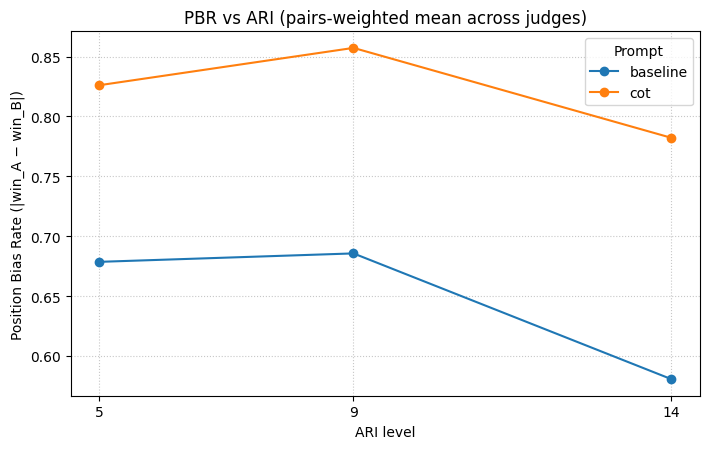

In [195]:
# ---------------------------
# Example calls (uncomment to run)
# ---------------------------

# 1) PBR line chart (weighted by strict pairs)
pbr_line_over_ari(
    df,
    title="PBR vs ARI (pairs-weighted mean across judges)",
    outfile_png="pbr_over_ari.png",
    outfile_pdf="pbr_over_ari.pdf",
)

# 2) Stacked ARI % — gpt-4, llama-3-70b, PoLL
stacked_ari_participation(
    summary_df,
    judges=["gpt-4","llama-3-70b","PoLL"],
    title="ARI Participation % — gpt-4, llama-3-70b, PoLL",
    outfile_png="ari_participation_top.png",
    outfile_pdf="ari_participation_top.pdf",
)

# 3) Stacked ARI % — Mistral, Qwen, GPT-3.5, PoLL
stacked_ari_participation(
    summary_df,
    judges=["Mistral","Qwen","GPT-3.5","PoLL"],
    title="ARI Participation % — Mistral, Qwen, GPT-3.5, PoLL",
    outfile_png="ari_participation_rest.png",
    outfile_pdf="ari_participation_rest.pdf",
)

In [120]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Helpers
# -----------------------------
def _to_num(x):
    try:
        return pd.to_numeric(x)
    except Exception:
        return x

def ensure_numeric_cols(df, cols):
    d = df.copy()
    for c in cols:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors="coerce")
    return d

def wilson_ci(k, n, z=1.96):
    """Wilson score interval for binomial proportion. Returns (p, low, high)."""
    if n <= 0:
        return (np.nan, np.nan, np.nan)
    p = k / n
    z2 = z * z
    denom = 1 + z2 / n
    center = (p + z2/(2*n)) / denom
    half_width = (z / denom) * math.sqrt((p*(1-p)/n) + (z2/(4*n*n)))
    return p, max(0.0, center - half_width), min(1.0, center + half_width)

def aggregate_pbr(df, by_cols):
    """
    Pool flips and n across 'by_cols' and compute Wilson CI.
    Expects columns: 'flips_count', 'n_pairs_strict'.
    Returns: grouped df with ['flips_sum','n_sum','pbr','ci_low','ci_high'] + by_cols.
    """
    req = {'flips_count','n_pairs_strict'}
    missing = req - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    g = (df.groupby(by_cols, dropna=False)[['flips_count','n_pairs_strict']]
           .sum(min_count=1)
           .reset_index()
           .rename(columns={'flips_count':'flips_sum','n_pairs_strict':'n_sum'}))

    rows = []
    for _, row in g.iterrows():
        p, lo, hi = wilson_ci(row['flips_sum'], row['n_sum'])
        r = row.to_dict()
        r.update({'pbr': p, 'ci_low': lo, 'ci_high': hi})
        rows.append(r)
    return pd.DataFrame(rows)

def _sorted_ari_vals(series):
    # Keep ARI in natural order 5,9,14 (fall back to sorted unique)
    desired = [5, 9, 14]
    vals = [v for v in desired if v in set(series)]
    # Append any extra ARIs not in desired
    extras = sorted([v for v in set(series) if v not in desired])
    return vals + extras

# -----------------------------
# RQ1: PBR vs ARI (pooled across judges), Baseline vs CoT
# -----------------------------
def plot_pbr_rq1_overall(df, *, title=""):
    """
    One figure: X=ARI {5,9,14}, Y=PBR with 95% Wilson CI.
    Two lines: baseline, cot. Pooled across judges (sum flips / sum n).
    Filters: metric_kind == 'rank'
    """
    d = df.copy()
    d = ensure_numeric_cols(d, ['ari','flips_count','n_pairs_strict','swap_flip_rate'])
    d = d[d['metric_kind'] == 'rank']
    d = d[d['prompt'].isin(['baseline','cot'])]

    agg = aggregate_pbr(d, by_cols=['prompt', 'ari'])
    # Enforce ARI order
    ari_order = _sorted_ari_vals(agg['ari'])
    # Prepare plot data
    prompts = ['baseline', 'cot']
    x = np.arange(len(ari_order))

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    for pr in prompts:
        sub = agg[agg['prompt'] == pr].set_index('ari').reindex(ari_order)
        y = sub['pbr'].values
        ylo = sub['ci_low'].values
        yhi = sub['ci_high'].values
        # error bars
        yerr_low = y - ylo
        yerr_high = yhi - y
        ax.errorbar(ari_order, y, yerr=[yerr_low, yerr_high], marker='o', linewidth=1.5, capsize=3, label=pr)

        # annotate total n on top of points
        n_vals = sub['n_sum'].values
        for xi, yi, nn in zip(ari_order, y, n_vals):
            ax.text(xi, yi + 0.02, f"n={int(nn)}", ha='center', va='bottom', fontsize=8)

    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (winner flips on swap)")
    ax.set_title(title)
    ax.set_ylim(0, 1.05)
    ax.set_xticks(ari_order)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()
    plt.show()

# -----------------------------
# RQ2: PBR PoLL vs GPT-3.5, Qwen, Mistral (pooled across ARIs), Baseline vs CoT
# -----------------------------
def plot_pbr_rq2_models(df, *, models=('gpt-3','Qwen','Mistral','PoLL'),
                        title=""):
    """
    One figure: X=models, each with two bars (baseline, cot).
    Y=PBR with 95% Wilson CI. Pooled across ARIs (sum flips / sum n).
    Filters: metric_kind == 'rank'
    """
    d = df.copy()
    d = ensure_numeric_cols(d, ['flips_count','n_pairs_strict','ari'])
    d = d[d['metric_kind'] == 'rank']
    d = d[d['judge'].isin(models)]
    d = d[d['prompt'].isin(['baseline','cot'])]

    agg = aggregate_pbr(d, by_cols=['judge','prompt'])
    # Preserve the desired model order
    agg['judge'] = pd.Categorical(agg['judge'], categories=list(models), ordered=True)
    agg = agg.sort_values(['judge','prompt'])

    # Build bar positions
    judges = list(models)
    x = np.arange(len(judges))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8.5, 4.5))

    for i, pr in enumerate(['baseline', 'cot']):
        sub = agg[agg['prompt'] == pr].set_index('judge').reindex(judges)
        y = sub['pbr'].values
        ylo = sub['ci_low'].values
        yhi = sub['ci_high'].values
        yerr = np.vstack((y - ylo, yhi - y))

        ax.bar(x + (i-0.5)*width, y, width=width, yerr=yerr, capsize=3, label=pr)
        # annotate n on bars
        n_vals = sub['n_sum'].values
        for xi, yi, nn in zip(x + (i-0.5)*width, y, n_vals):
            ax.text(xi, yi + 0.02, f"n={int(nn)}", ha='center', va='bottom', fontsize=8, rotation=0)

    ax.set_xticks(x)
    ax.set_xticklabels(judges)
    ax.set_ylabel("Position Bias Rate (winner flips on swap)")
    ax.set_title(title)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()
    plt.show()

# -----------------------------
# HOW TO USE:
# pbr_df = <your DataFrame exactly like the table you posted>
# plot_pbr_rq1_overall(pbr_df)
# plot_pbr_rq2_models(pbr_df, models=('gpt-3','Qwen','Mistral','PoLL'))
# -----------------------------


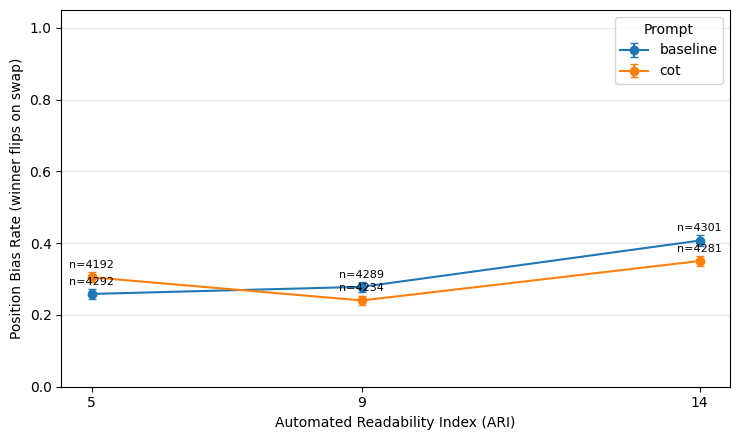

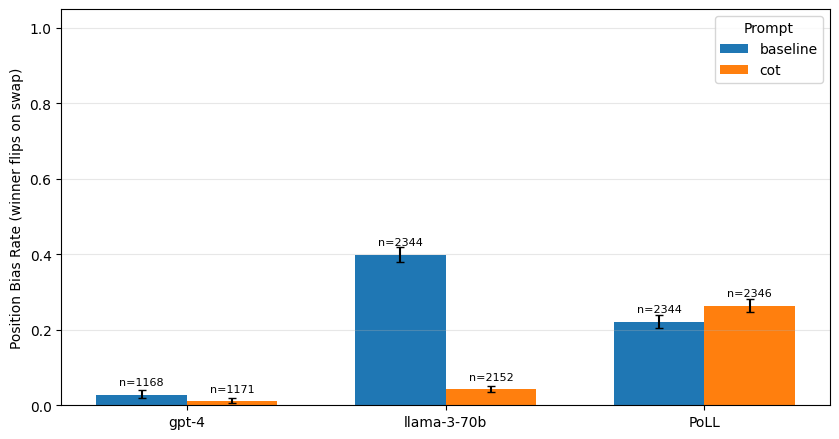

In [121]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

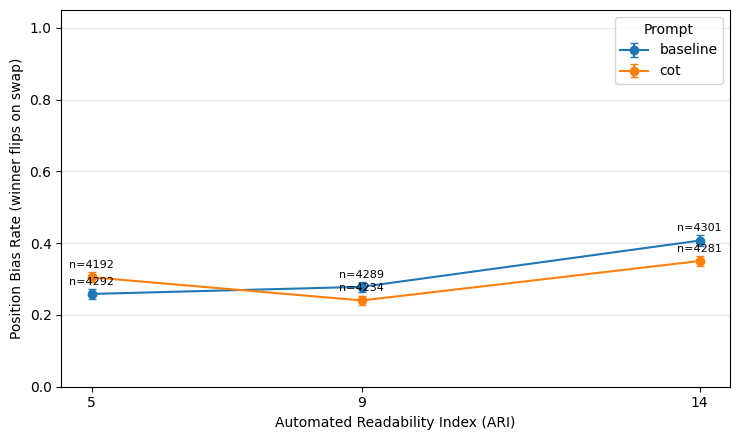

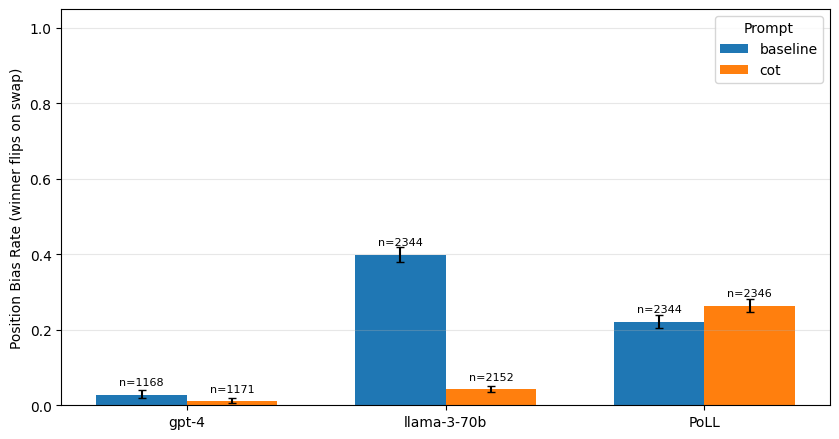

In [108]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

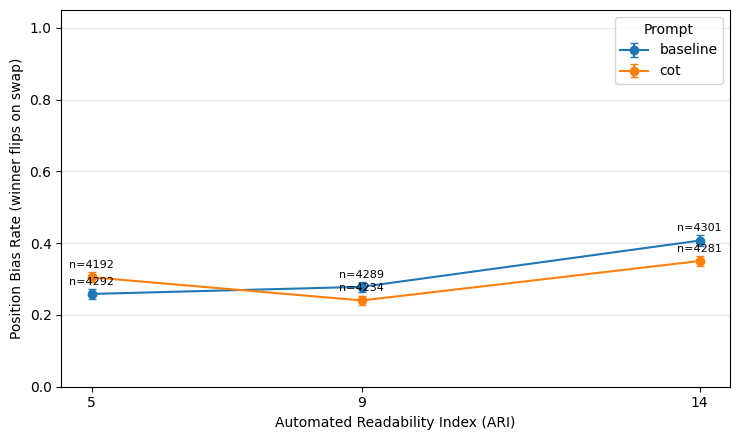

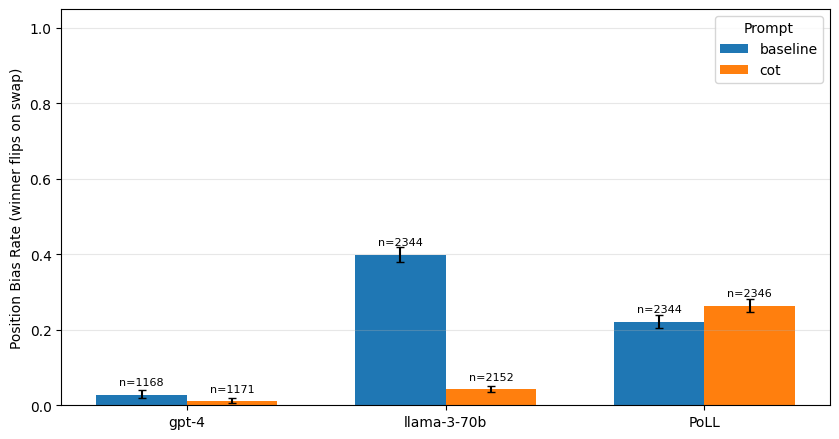

In [109]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

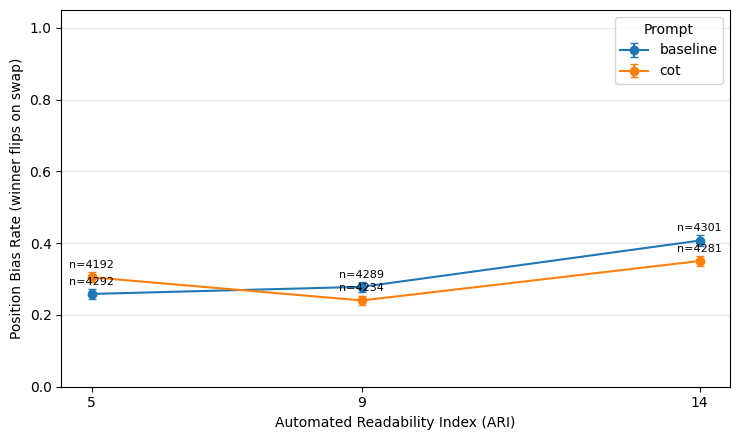

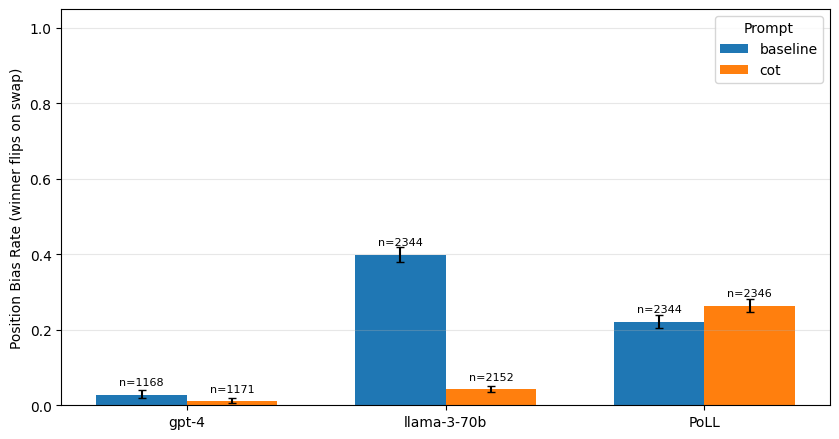

In [110]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

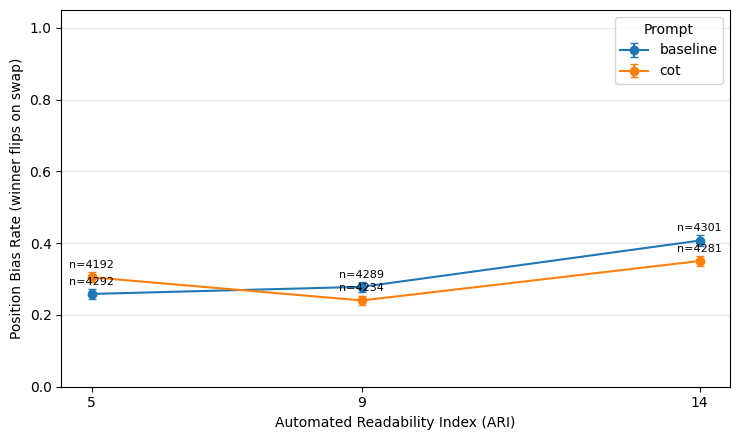

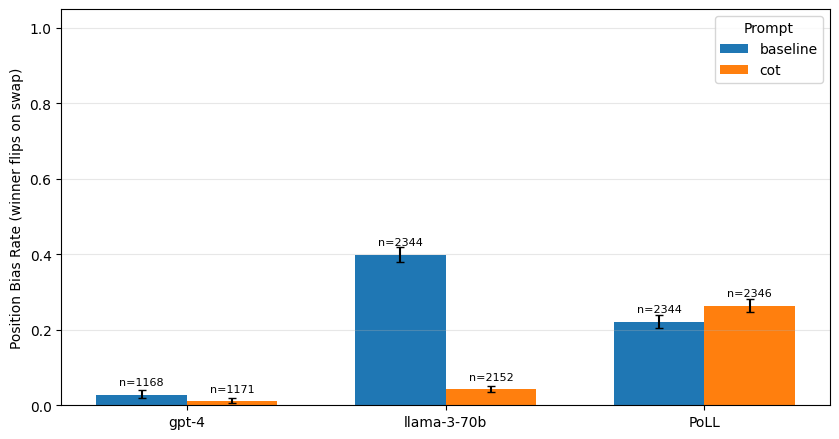

In [111]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

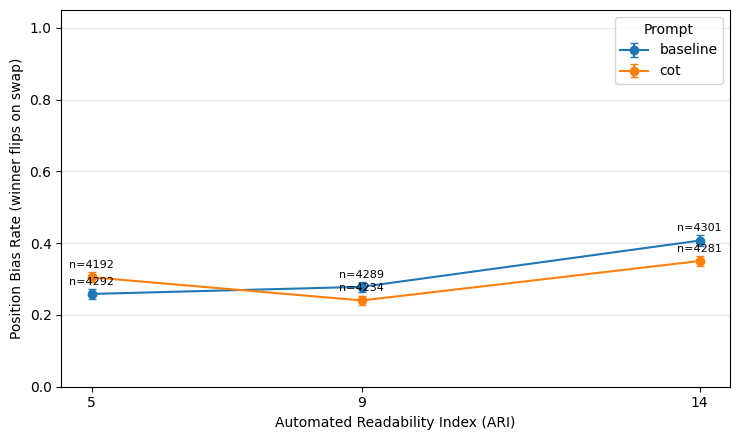

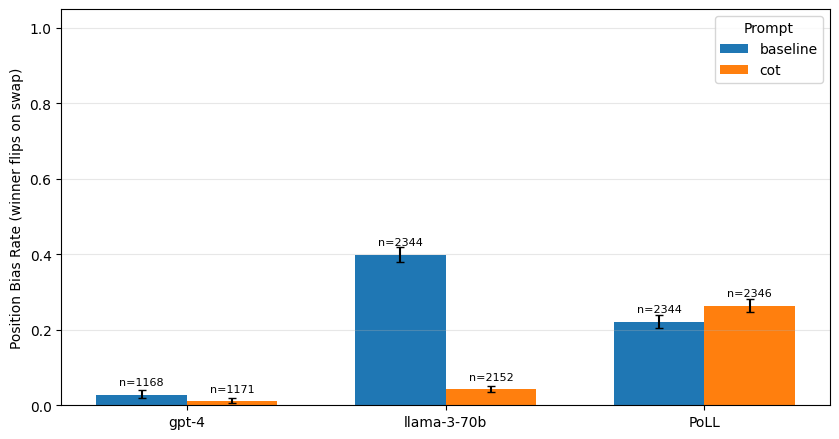

In [112]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

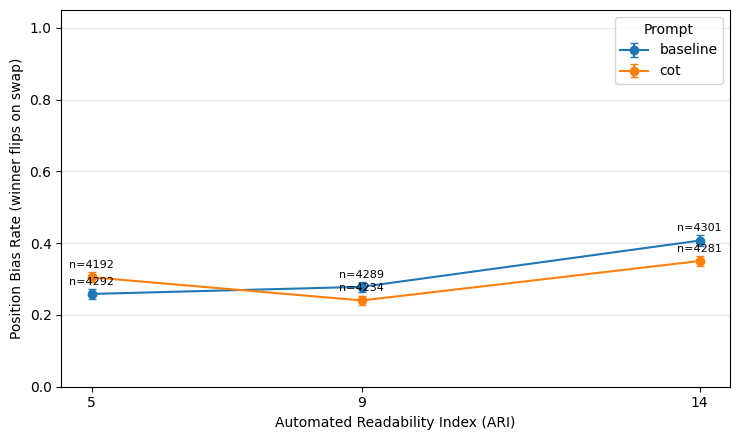

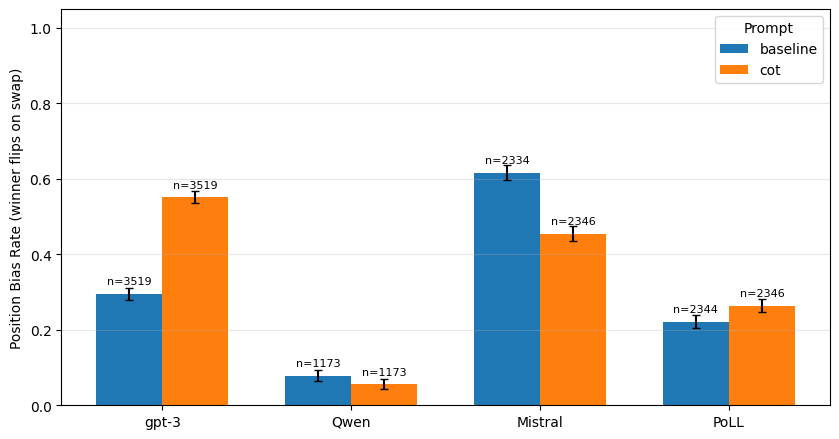

In [113]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'))

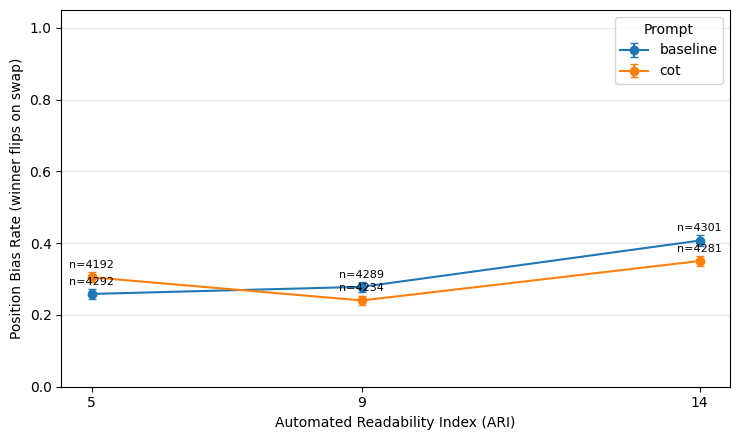

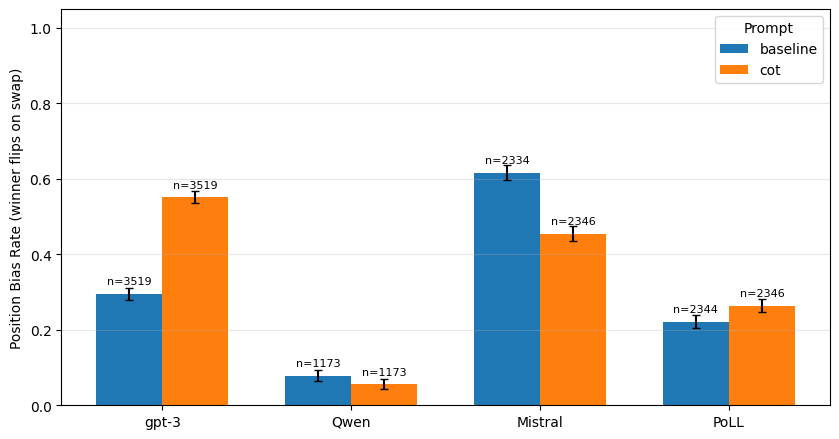

In [114]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'))

In [115]:
def plot_pbr_rq1_overall(df_all, savepath=None,
                         title="Position Bias Rate (PBR) vs. Readability (RQ1)"):
    import math, numpy as np, pandas as pd, matplotlib.pyplot as plt
    # --- same helpers as before: ensure_numeric_cols, wilson_ci, aggregate_pbr, _ordered_ari ---

    d = ensure_numeric_cols(df_all, ['ari','flips_count','n_pairs_strict'])
    d = d[(d['metric_kind']=='rank') & (d['prompt'].isin(['baseline','cot']))]

    agg = aggregate_pbr(d, by_cols=['prompt','ari'])
    ari_order = _ordered_ari(agg['ari'])

    fig, ax = plt.subplots(figsize=(9.6, 4.6))   # a bit wider
    for prompt in ['baseline','cot']:
        sub = agg[agg['prompt']==prompt].set_index('ari').reindex(ari_order)
        y = sub['pbr'].values
        yerr = np.vstack((y - sub['ci_low'].values, sub['ci_high'].values - y))
        ax.errorbar(ari_order, y, yerr=yerr, marker='o', linewidth=1.8,
                    capsize=3.5, label=prompt)
        for x, yy, nn in zip(ari_order, y, sub['n_sum'].values):
            ax.text(x, yy + 0.02, f"n={int(nn)}", ha='center', va='bottom', fontsize=8)

    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (winner flips on swap)")
    ax.set_ylim(0, 1.05)
    ax.set_xticks(ari_order)
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.35)

    # Legend OUTSIDE (right) + extra right margin so it’s not cropped
    leg = ax.legend(title="Prompt", loc='center left',
                    bbox_to_anchor=(1.02, 0.5), frameon=True, borderaxespad=0.6,
                    handlelength=1.8, labelspacing=0.6, borderpad=0.6)
    plt.subplots_adjust(right=0.78)  # <-- give space for legend

    if savepath:
        # ensure legend isn’t cut when saving
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()


def plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'),
                        savepath=None,
                        title="PBR: PoLL vs Constituent Judges (RQ2)"):
    import numpy as np, pandas as pd, matplotlib.pyplot as plt
    d = ensure_numeric_cols(df_all, ['flips_count','n_pairs_strict','ari'])
    d = d[(d['metric_kind']=='rank') & (d['prompt'].isin(['baseline','cot']))]
    d = d[d['judge'].isin(models)]

    agg = aggregate_pbr(d, by_cols=['judge','prompt'])
    agg['judge'] = pd.Categorical(agg['judge'], categories=list(models), ordered=True)
    agg = agg.sort_values(['judge','prompt'])

    x = np.arange(len(models)); width = 0.38
    fig, ax = plt.subplots(figsize=(9.6, 4.6))
    for i, pr in enumerate(['baseline','cot']):
        sub = agg[agg['prompt']==pr].set_index('judge').reindex(models)
        y = sub['pbr'].values
        yerr = np.vstack((y - sub['ci_low'].values, sub['ci_high'].values - y))
        ax.bar(x + (i-0.5)*width, y, width=width, yerr=yerr, capsize=3.5, label=pr)
        for xi, yi, nn in zip(x + (i-0.5)*width, y, sub['n_sum'].values):
            ax.text(xi, yi + 0.02, f"n={int(nn)}", ha='center', va='bottom', fontsize=8)

    ax.set_xticks(x); ax.set_xticklabels(models)
    ax.set_ylabel("Position Bias Rate (winner flips on swap)")
    ax.set_ylim(0, 1.05)
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.35)

    leg = ax.legend(title="Prompt", loc='center left',
                    bbox_to_anchor=(1.02, 0.5), frameon=True, borderaxespad=0.6,
                    handlelength=1.8, labelspacing=0.6, borderpad=0.6)
    plt.subplots_adjust(right=0.78)

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()


In [116]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'))

NameError: name '_ordered_ari' is not defined

In [41]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- helpers ----------
def ensure_numeric_cols(df, cols):
    d = df.copy()
    for c in cols:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors="coerce")
    return d

def wilson_ci(k, n, z=1.96):
    if n <= 0:
        return (np.nan, np.nan, np.nan)
    p = k / n
    z2 = z*z
    denom = 1 + z2/n
    center = (p + z2/(2*n)) / denom
    half = (z/denom) * math.sqrt((p*(1-p)/n) + (z2/(4*n*n)))
    return p, max(0.0, center - half), min(1.0, center + half)

def aggregate_pbr(df, by_cols):
    """Pool flips & n, compute PBR and Wilson CI per group."""
    g = (df.groupby(by_cols, dropna=False)[['flips_count','n_pairs_strict']]
           .sum(min_count=1).reset_index()
           .rename(columns={'flips_count':'flips_sum','n_pairs_strict':'n_sum'}))
    rows = []
    for _, r in g.iterrows():
        p, lo, hi = wilson_ci(int(r['flips_sum']), int(r['n_sum']))
        rows.append({**r, 'pbr': p, 'ci_low': lo, 'ci_high': hi})
    return pd.DataFrame(rows)

def _radar_angles(n):
    # equally spaced angles; repeat first angle at end to close polygon
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    return np.concatenate([angles, angles[:1]])

def _close(values):
    return np.concatenate([values, values[:1]])

# ---------- RQ1 radar: Stability vs ARI (pooled across judges) ----------
def radar_pbr_rq1(df_all, savepath=None,
                  title="Position Stability (1−PBR) by Readability (RQ1)"):
    d = ensure_numeric_cols(df_all, ['ari','flips_count','n_pairs_strict'])
    d = d[(d['metric_kind']=='rank') & (d['prompt'].isin(['baseline','cot']))]
    agg = aggregate_pbr(d, by_cols=['prompt','ari'])

    # order ARIs
    ari_order = [v for v in [5,9,14] if v in set(agg['ari'])]
    labels = [f"ARI {a}" for a in ari_order]
    angles = _radar_angles(len(ari_order))

    fig = plt.figure(figsize=(6.8, 6.2))
    ax = plt.subplot(111, polar=True)

    for pr in ['baseline','cot']:
        sub = (agg[agg['prompt']==pr].set_index('ari')
               .reindex(ari_order))
        stability = 1.0 - sub['pbr'].values.astype(float)
        vals = _close(stability)
        ax.plot(angles, vals, linewidth=2, marker='o', label=pr)
        ax.fill(angles, vals, alpha=0.10)  # light fill
        # annotate n on each spoke
        n_vals = sub['n_sum'].values.astype(int)
        for ang, val, n in zip(angles[:-1], stability, n_vals):
            ax.text(ang, min(1.02, val+0.04), f"n={n}", ha='center', va='bottom', fontsize=8)

    # radial settings (0..1 with helpful rings)
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 1.0)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(["0.25","0.50","0.75","1.00"])
    ax.set_xticks(_radar_angles(len(ari_order))[:-1])
    ax.set_xticklabels(labels)

    ax.set_title(title, pad=18)
    # legend outside right
    lg = plt.legend(title="Prompt", loc='center left', bbox_to_anchor=(1.08, 0.5),
                    frameon=True)
    plt.tight_layout(rect=[0,0,0.86,1])
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

# ---------- RQ2 radar: Stability vs Model (pooled across ARIs) ----------
def radar_pbr_rq2(df_all, models=('gpt-3','Qwen','Mistral','PoLL'),
                  savepath=None,
                  title="Position Stability (1−PBR): PoLL vs Constituent Judges (RQ2)"):
    d = ensure_numeric_cols(df_all, ['flips_count','n_pairs_strict','ari'])
    d = d[(d['metric_kind']=='rank') & (d['prompt'].isin(['baseline','cot']))]
    d = d[d['judge'].isin(models)]
    agg = aggregate_pbr(d, by_cols=['judge','prompt'])
    agg['judge'] = pd.Categorical(agg['judge'], categories=list(models), ordered=True)
    agg = agg.sort_values(['judge','prompt'])

    labels = list(models)
    angles = _radar_angles(len(labels))

    fig = plt.figure(figsize=(7.0, 6.4))
    ax = plt.subplot(111, polar=True)

    for pr in ['baseline','cot']:
        sub = agg[agg['prompt']==pr].set_index('judge').reindex(models)
        stability = 1.0 - sub['pbr'].values.astype(float)
        vals = _close(stability)
        ax.plot(angles, vals, linewidth=2, marker='o', label=pr)
        ax.fill(angles, vals, alpha=0.10)
        n_vals = sub['n_sum'].values.astype(int)
        for ang, val, n in zip(angles[:-1], stability, n_vals):
            ax.text(ang, min(1.02, val+0.04), f"n={n}", ha='center', va='bottom', fontsize=8)

    ax.set_rlabel_position(0)
    ax.set_ylim(0, 1.0)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(["0.25","0.50","0.75","1.00"])
    ax.set_xticks(_radar_angles(len(labels))[:-1])
    ax.set_xticklabels(labels)

    ax.set_title(title, pad=18)
    lg = plt.legend(title="Prompt", loc='center left', bbox_to_anchor=(1.08, 0.5),
                    frameon=True)
    plt.tight_layout(rect=[0,0,0.86,1])
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()


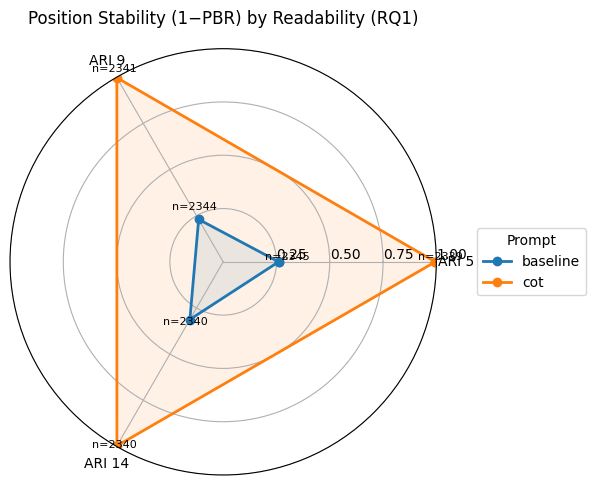

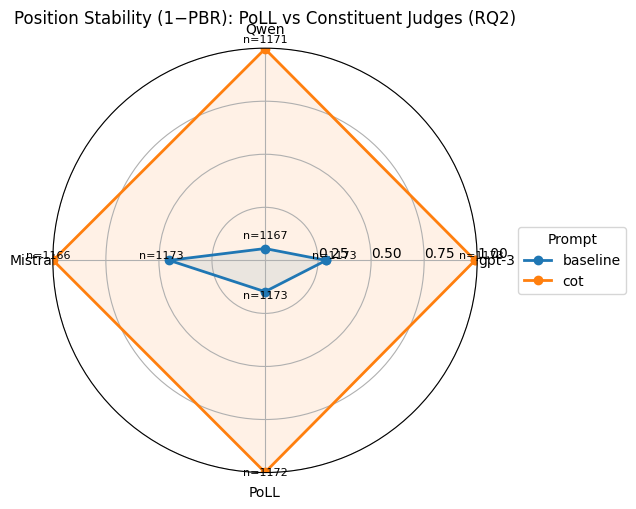

In [42]:
# df_all is your PBR dataframe
radar_pbr_rq1(df_all, savepath="figs/radar_pbr_rq1.pdf")
radar_pbr_rq2(df_all, savepath="figs/radar_pbr_rq2.pdf")


In [43]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ensure_numeric_cols(df, cols):
    d = df.copy()
    for c in cols:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors="coerce")
    return d

def wilson_ci(k, n, z=1.96):
    if n <= 0: return (np.nan, np.nan, np.nan)
    p = k / n; z2 = z*z; denom = 1 + z2/n
    center = (p + z2/(2*n)) / denom
    half = (z/denom) * math.sqrt((p*(1-p)/n) + (z2/(4*n*n)))
    return p, max(0.0, center-half), min(1.0, center+half)

def aggregate_pbr(df, by_cols):
    g = (df.groupby(by_cols, dropna=False)[['flips_count','n_pairs_strict']]
           .sum(min_count=1).reset_index()
           .rename(columns={'flips_count':'flips_sum','n_pairs_strict':'n_sum'}))
    rows = []
    for _, r in g.iterrows():
        p, lo, hi = wilson_ci(int(r['flips_sum']), int(r['n_sum']))
        rows.append({**r, 'pbr': p, 'ci_low': lo, 'ci_high': hi})
    return pd.DataFrame(rows)

def _ordered_ari(vals, pref=(5,9,14)):
    u = list(sorted(set(int(v) for v in vals)))
    return [v for v in pref if v in u] + [v for v in u if v not in pref]

def _approx_span(nmin, nmax):
    # Show a compact range in 'k'
    def _k(x): return f"{x/1000:.2f}k" if x >= 1000 else f"{x}"
    return f"{_k(nmin)}–{_k(nmax)}" if nmax != nmin else f"≈{_k(nmax)}"


In [44]:
def plot_pbr_rq1_overall(df_all, savepath=None,
                         title="Position Bias Rate (PBR) vs. Readability (RQ1)"):
    d = ensure_numeric_cols(df_all, ['ari','flips_count','n_pairs_strict'])
    d = d[(d['metric_kind']=='rank') & (d['prompt'].isin(['baseline','cot']))]
    agg = aggregate_pbr(d, by_cols=['prompt','ari'])
    ari_order = _ordered_ari(agg['ari'])

    # compute approximate n per spoke for legend note
    notes = {}
    for pr in ['baseline','cot']:
        sub = agg[agg['prompt']==pr]
        if not sub.empty:
            nmin, nmax = int(sub['n_sum'].min()), int(sub['n_sum'].max())
            notes[pr] = _approx_span(nmin, nmax)

    fig, ax = plt.subplots(figsize=(9.6, 4.6))
    for pr in ['baseline','cot']:
        sub = agg[agg['prompt']==pr].set_index('ari').reindex(ari_order)
        y = sub['pbr'].values
        yerr = np.vstack((y - sub['ci_low'].values, sub['ci_high'].values - y))
        ax.errorbar(ari_order, y, yerr=yerr, marker='o', linewidth=1.8,
                    capsize=3.5, label=f"{pr}  (n/spoke≈{notes.get(pr,'—')})")

    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (winner flips on swap)")
    ax.set_ylim(0, 1.05); ax.set_xticks(ari_order)
    ax.set_title(title); ax.grid(axis='y', linestyle='--', alpha=0.35)

    leg = ax.legend(title="Prompt", loc='center left', bbox_to_anchor=(1.02, 0.5),
                    frameon=True, borderaxespad=0.6, handlelength=1.8,
                    labelspacing=0.6, borderpad=0.6)
    plt.subplots_adjust(right=0.78)
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()


In [45]:
def plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'),
                        savepath=None,
                        title="PBR: PoLL vs Constituent Judges (RQ2)"):
    d = ensure_numeric_cols(df_all, ['flips_count','n_pairs_strict','ari'])
    d = d[(d['metric_kind']=='rank') & (d['prompt'].isin(['baseline','cot'])) & (d['judge'].isin(models))]
    agg = aggregate_pbr(d, by_cols=['judge','prompt'])
    agg['judge'] = pd.Categorical(agg['judge'], categories=list(models), ordered=True)
    agg = agg.sort_values(['judge','prompt'])

    # legend note: approximate n per model
    notes = {}
    for pr in ['baseline','cot']:
        sub = agg[agg['prompt']==pr]
        if not sub.empty:
            nmin, nmax = int(sub['n_sum'].min()), int(sub['n_sum'].max())
            notes[pr] = _approx_span(nmin, nmax)

    x = np.arange(len(models)); width = 0.38
    fig, ax = plt.subplots(figsize=(9.6, 4.6))
    for i, pr in enumerate(['baseline','cot']):
        sub = agg[agg['prompt']==pr].set_index('judge').reindex(models)
        y = sub['pbr'].values
        yerr = np.vstack((y - sub['ci_low'].values, sub['ci_high'].values - y))
        ax.bar(x + (i-0.5)*width, y, width=width, yerr=yerr, capsize=3.5,
               label=f"{pr}  (n/model≈{notes.get(pr,'—')})")

    ax.set_xticks(x); ax.set_xticklabels(models)
    ax.set_ylabel("Position Bias Rate (winner flips on swap)")
    ax.set_ylim(0, 1.05); ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.35)

    leg = ax.legend(title="Prompt", loc='center left',
                    bbox_to_anchor=(1.02, 0.5), frameon=True, borderaxespad=0.6,
                    handlelength=1.8, labelspacing=0.6, borderpad=0.6)
    plt.subplots_adjust(right=0.78)
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()


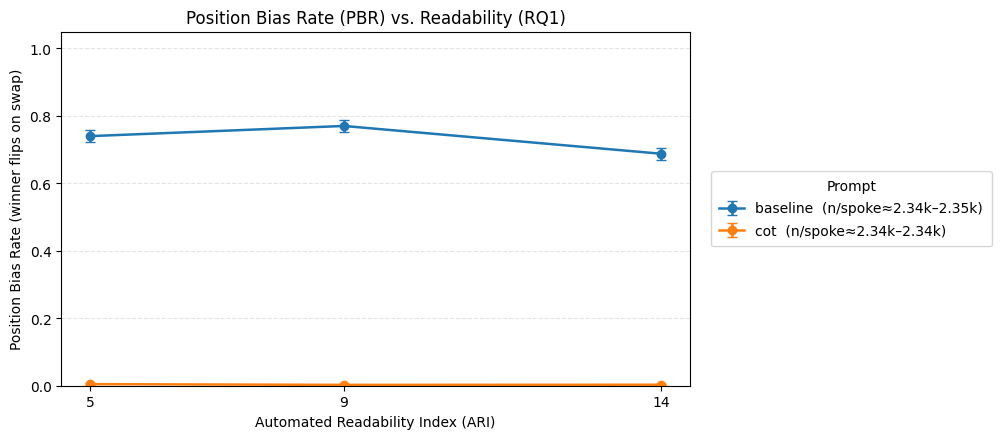

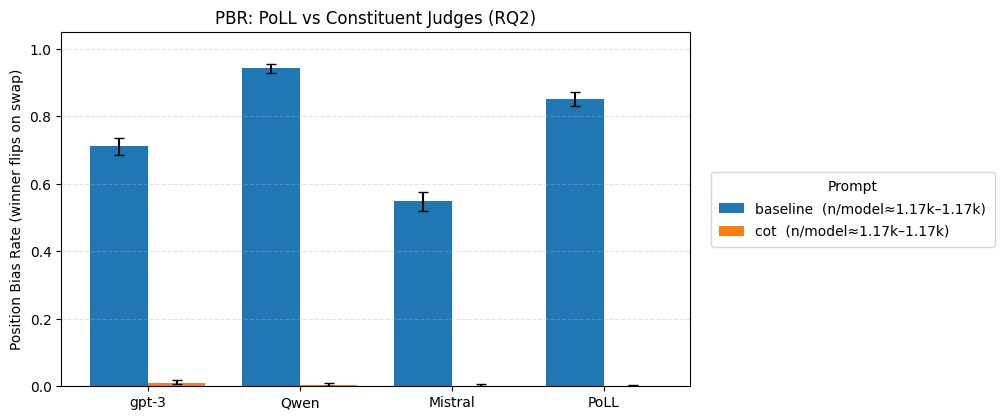

In [46]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'))

In [69]:
# -----------------------------
# RQ1: PBR vs ARI (pooled across judges), Baseline vs CoT
# -----------------------------
def plot_pbr_rq1_overall(df, *, title="", save_pdf_path=None):
    d = df.copy()
    d = ensure_numeric_cols(d, ['ari','flips_count','n_pairs_strict','swap_flip_rate'])
    d = d[d['metric_kind'] == 'rank']
    d = d[d['prompt'].isin(['baseline','cot'])]

    agg = aggregate_pbr(d, by_cols=['prompt', 'ari'])
    ari_order = _sorted_ari_vals(agg['ari'])
    prompts = ['baseline', 'cot']

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    for pr in prompts:
        sub = agg[agg['prompt'] == pr].set_index('ari').reindex(ari_order)
        y   = sub['pbr'].values
        ylo = sub['ci_low'].values
        yhi = sub['ci_high'].values
        ax.errorbar(
            ari_order, y,
            yerr=[y - ylo, yhi - y],
            marker='o', linewidth=1.5, capsize=3, label=pr
        )

        # annotate RATE instead of percent
        for xi, yi in zip(ari_order, y):
            ax.text(xi, yi + 0.02, f"{yi:.2f}", ha='center', va='bottom', fontsize=8)

    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_title(title)
    ax.set_ylim(0, 1.05)
    ax.set_xticks(ari_order)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()
    if save_pdf_path:
        fig.savefig(save_pdf_path,
                    format="pdf",
                    bbox_inches="tight",
                    pad_inches=0.02,
                    transparent=True)
    plt.show()


# -----------------------------
# RQ2: PBR PoLL vs models (pooled across ARIs), Baseline vs CoT
# -----------------------------
def plot_pbr_rq2_models(df, *, models=('gpt-3','Qwen','Mistral','PoLL'), title="", save_pdf_path=None):
    d = df.copy()
    d = ensure_numeric_cols(d, ['flips_count','n_pairs_strict','ari'])
    d = d[d['metric_kind'] == 'rank']
    d = d[d['judge'].isin(models)]
    d = d[d['prompt'].isin(['baseline','cot'])]

    agg = aggregate_pbr(d, by_cols=['judge','prompt'])
    agg['judge'] = pd.Categorical(agg['judge'], categories=list(models), ordered=True)
    agg = agg.sort_values(['judge','prompt'])

    judges = list(models)
    x = np.arange(len(judges))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8.5, 4.5))
    for i, pr in enumerate(['baseline', 'cot']):
        sub = agg[agg['prompt'] == pr].set_index('judge').reindex(judges)
        y   = sub['pbr'].values
        ylo = sub['ci_low'].values
        yhi = sub['ci_high'].values
        yerr = np.vstack((y - ylo, yhi - y))

        bars_x = x + (i - 0.5) * width
        ax.bar(bars_x, y, width=width, yerr=yerr, capsize=3, label=pr)

        # annotate RATE instead of percent
        for xi, yi in zip(bars_x, y):
            ax.text(xi, yi + 0.02, f"{yi:.2f}", ha='center', va='bottom', fontsize=8)

    ax.set_xticks(x)
    ax.set_xticklabels(judges)
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_title(title)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()
    if save_pdf_path:
        fig.savefig(save_pdf_path,
                    format="pdf",
                    bbox_inches="tight",
                    pad_inches=0.02,
                    transparent=True)
    plt.show()


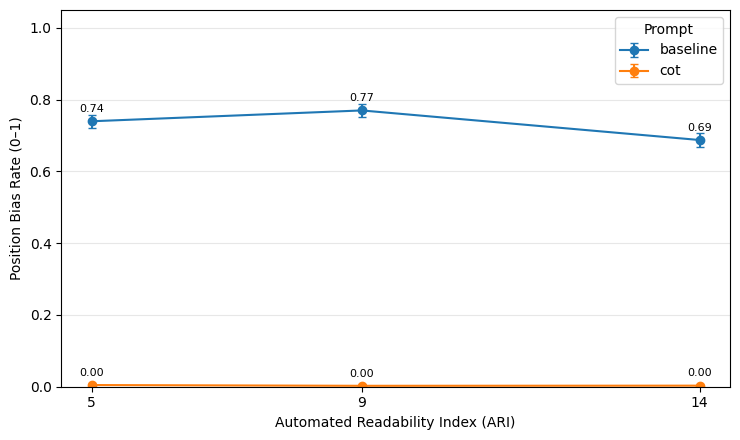

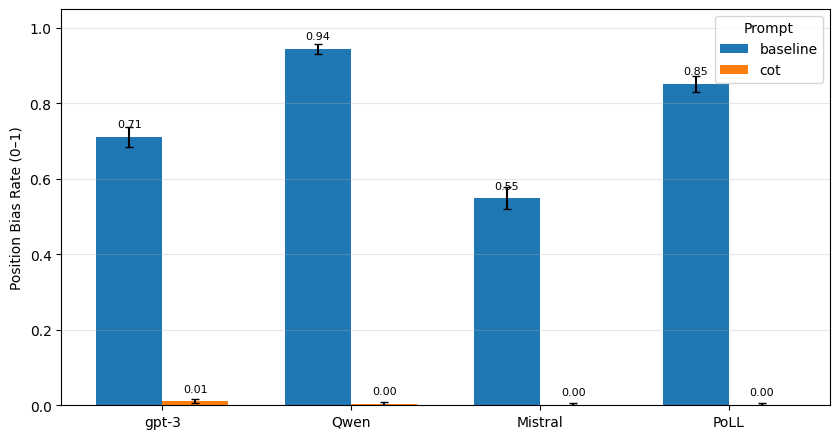

In [70]:
plot_pbr_rq1_overall(df_all,save_pdf_path="figs/pbr_rq1_overall.pdf")
plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'),save_pdf_path="figs/pbr_rq2_constituent.pdf")

In [116]:
df_all

,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0
1,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0
2,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0
3,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0
4,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
86,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
87,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
88,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0


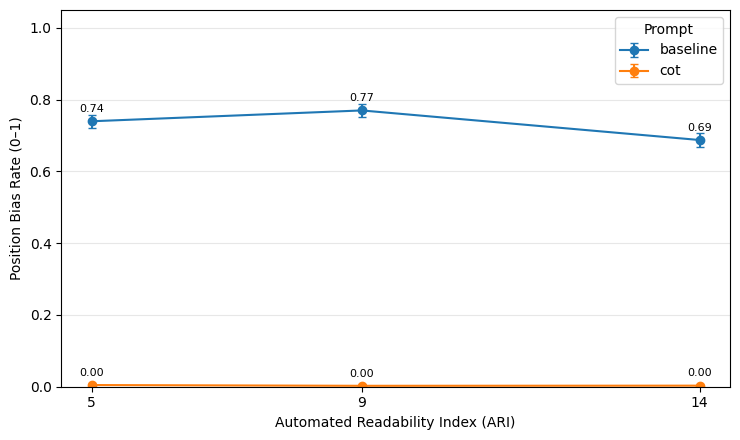

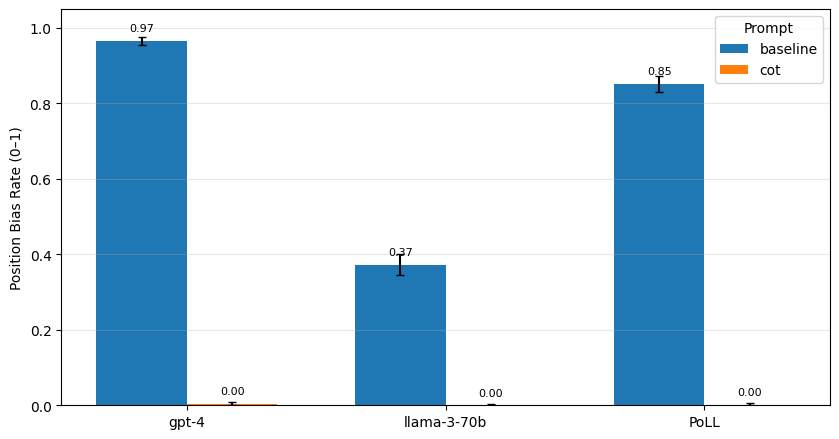

In [71]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

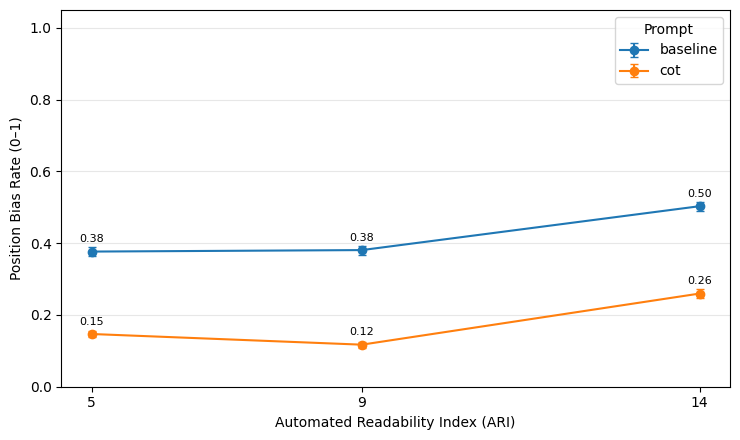

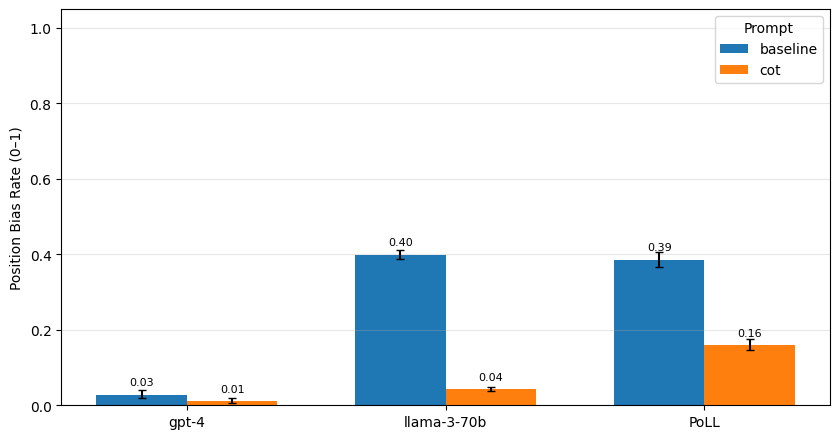

In [92]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-4','llama-3-70b','PoLL'))

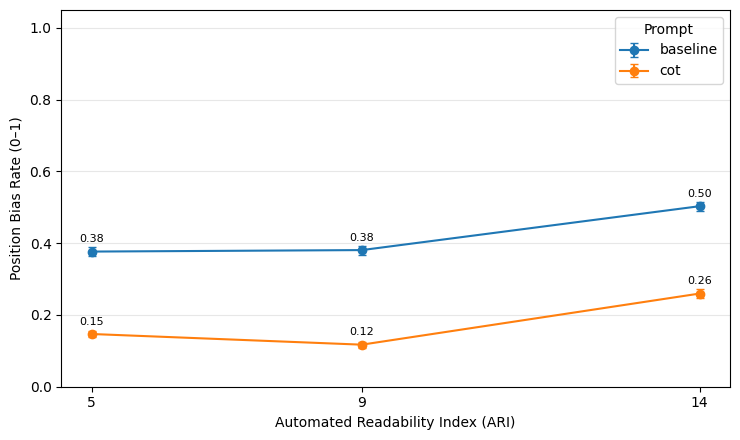

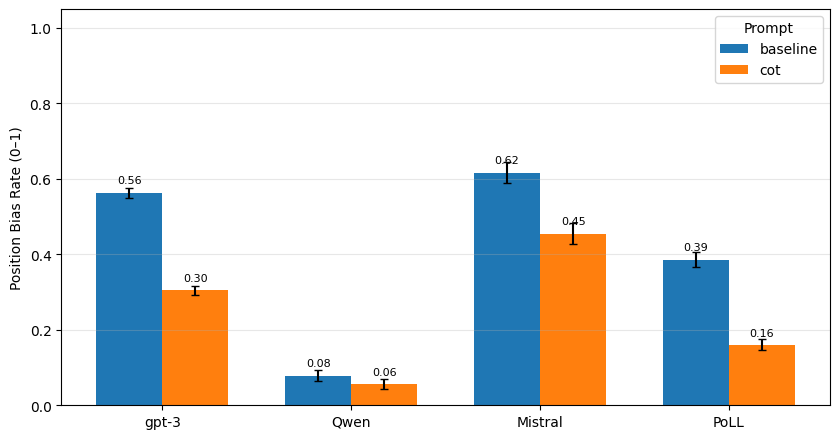

In [93]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'))

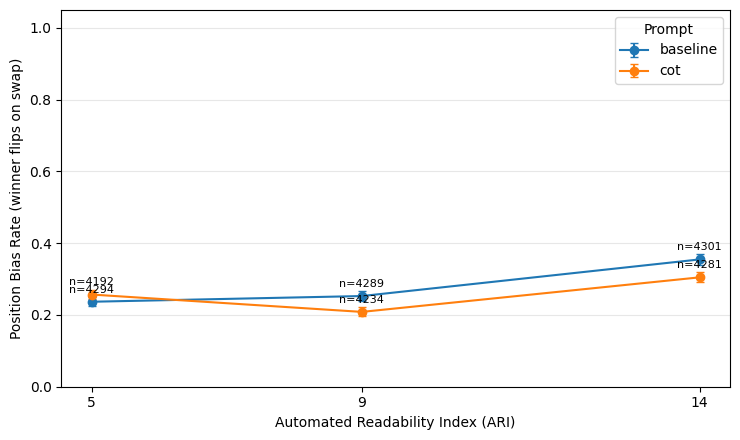

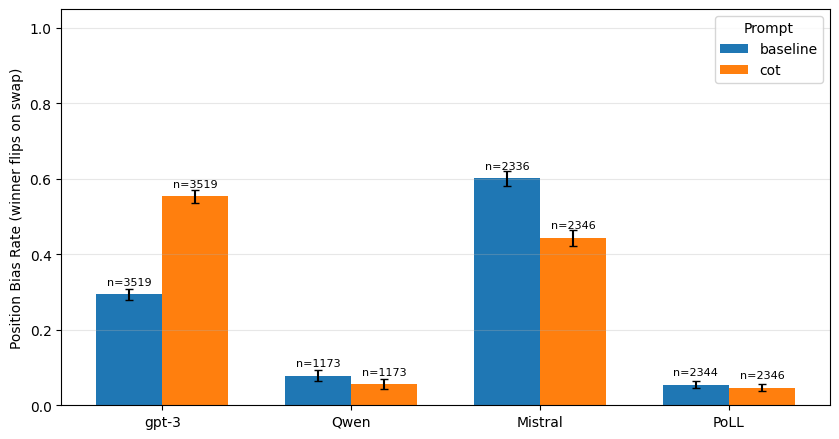

In [73]:
plot_pbr_rq1_overall(df_all)
plot_pbr_rq2_models(df_all, models=('gpt-3','Qwen','Mistral','PoLL'))

In [97]:
def aggregate_pbr(df, by_cols, *, average='macro', exclude_ensembles=True, ensembles=('PoLL',)):
    d = df.copy()
    d = ensure_numeric_cols(d, ['flips_count','n_pairs_strict'])
    d = d[d['n_pairs_strict'] > 0]

    if exclude_ensembles and 'judge' in d.columns:
        d = d[~d['judge'].isin(ensembles)]

    # per-(judge, group) ratio-of-sums to avoid mean-of-rates pitfalls
    group_cols = list(dict.fromkeys(by_cols + (['judge'] if 'judge' in d.columns else [])))
    per_judge = (
        d.groupby(group_cols, dropna=False)
         .agg(flips=('flips_count','sum'), n=('n_pairs_strict','sum'))
         .reset_index()
    )
    per_judge['pbr'] = per_judge['flips'] / per_judge['n']

    if average == 'macro':
        # equal weight per judge (recommended for RQ1 “across judges”)
        agg = (per_judge.groupby(by_cols, dropna=False)
               .agg(pbr=('pbr','mean'),
                    sd=('pbr','std'),
                    k=('pbr','size'))
               .reset_index())
        # t-interval over judges
        from math import sqrt
        from scipy.stats import t
        agg['ci_low']  = agg.apply(lambda r: r['pbr'] - t.ppf(0.975, max(r['k']-1,1)) * (r['sd']/sqrt(max(r['k'],1))), axis=1)
        agg['ci_high'] = agg.apply(lambda r: r['pbr'] + t.ppf(0.975, max(r['k']-1,1)) * (r['sd']/sqrt(max(r['k'],1))), axis=1)
        return agg[['pbr','ci_low','ci_high'] + by_cols]
    elif average == 'micro':
        # pooled across pairs (report this too, but label it)
        pooled = (d.groupby(by_cols, dropna=False)
                    .agg(flips=('flips_count','sum'), n=('n_pairs_strict','sum'))
                    .reset_index())
        from statsmodels.stats.proportion import proportion_confint
        def wilson(row):
            lo, hi = proportion_confint(row['flips'], row['n'], method='wilson')
            return pd.Series({'pbr': row['flips']/row['n'], 'ci_low': lo, 'ci_high': hi})
        out = pooled.join(pooled.apply(wilson, axis=1))
        return out[['pbr','ci_low','ci_high'] + by_cols]
    else:
        raise ValueError("average must be 'macro' or 'micro'")


In [101]:
# === 0) Build the filtered working frame 'd' from your master DF ===
#     (change df_all -> your master dataframe name if needed)
d = (
    df_all.copy()                                    # <-- your master DF
      .query("metric_kind == 'rank' and prompt in ['baseline','cot']")
)
for c in ['ari','flips_count','n_pairs_strict','swap_flip_rate']:
    if c in d.columns:
        d[c] = pd.to_numeric(d[c], errors='coerce')
d = d[d['n_pairs_strict'] > 0]

# === 1) Robust aggregator (macro by default) ===
import numpy as np
import pandas as pd
from math import sqrt

def _z975():  # normal 97.5% quantile
    try:
        from scipy.stats import norm
        return norm.ppf(0.975)
    except Exception:
        return 1.96

def wilson_ci(successes, n, z=None):
    z = _z975() if z is None else z
    if n == 0:
        return (np.nan, np.nan)
    p = successes / n
    denom = 1 + z**2 / n
    centre = p + z**2 / (2*n)
    half = z * np.sqrt((p*(1-p) + z**2/(4*n)) / n)
    lo = (centre - half) / denom
    hi = (centre + half) / denom
    return lo, hi

def aggregate_pbr(df, by_cols, *, average='macro', exclude_ensembles=True, ensembles=('PoLL',)):
    d0 = df.copy()
    if exclude_ensembles and 'judge' in d0.columns:
        d0 = d0[~d0['judge'].isin(ensembles)]

    # per-judge ratio-of-sums first
    group_cols = list(dict.fromkeys(by_cols + (['judge'] if 'judge' in d0.columns else [])))
    per_judge = (
        d0.groupby(group_cols, dropna=False)
          .agg(flips=('flips_count','sum'), n=('n_pairs_strict','sum'))
          .reset_index()
    )
    per_judge['pbr'] = per_judge['flips'] / per_judge['n']

    if average == 'macro':
        # equal weight per judge
        agg = (per_judge.groupby(by_cols, dropna=False)
               .agg(pbr=('pbr','mean'),
                    sd=('pbr','std'),
                    k=('pbr','size'))
               .reset_index())
        # t-interval over judges (approx.)
        from math import sqrt
        t975 = 2.776  # df≈4 small-sample conservative; ok for ~5–7 judges
        se = agg['sd'] / np.sqrt(np.maximum(agg['k'], 1))
        agg['ci_low']  = agg['pbr'] - t975 * se
        agg['ci_high'] = agg['pbr'] + t975 * se
        return agg
    elif average == 'micro':
        pooled = (d0.groupby(by_cols, dropna=False)
                    .agg(flips=('flips_count','sum'), n=('n_pairs_strict','sum'))
                    .reset_index())
        cis = pooled.apply(lambda r: pd.Series(wilson_ci(r['flips'], r['n']), index=['ci_low','ci_high']), axis=1)
        pooled['pbr'] = pooled['flips'] / pooled['n']
        pooled = pd.concat([pooled, cis], axis=1)
        return pooled
    else:
        raise ValueError("average must be 'macro' or 'micro'")

# === 2) Diagnostics: show where weighting comes from ===
print("\nPairs by judge at ARI=14 (baseline):")
print(
    d.query("ari == 14 and prompt == 'baseline'")
     .groupby('judge')[['flips_count','n_pairs_strict']]
     .sum()
     .assign(pbr=lambda x: x['flips_count']/x['n_pairs_strict'])
     .sort_values('pbr', ascending=False)
)

# === 3) Compute overall (RQ1) tables ===
agg_macro = aggregate_pbr(d, by_cols=['prompt','ari'], average='macro', exclude_ensembles=True)
agg_micro = aggregate_pbr(d, by_cols=['prompt','ari'], average='micro', exclude_ensembles=True)
print("\nRQ1 overall PBR (MACRO, PoLL excluded):\n", agg_macro)
print("\nRQ1 overall PBR (MICRO, PoLL excluded):\n", agg_micro)

# === 4) If you want to re-plot with the fixed aggregator, call your function using 'd' ===
# Example using your existing plotter with 'd' as input:




Pairs by judge at ARI=14 (baseline):
             flips_count  n_pairs_strict       pbr
judge                                             
gpt-3               1460          1955.0  0.746803
Mistral              274           391.0  0.700767
PoLL                 418           782.0  0.534527
llama-3-70b          755          1955.0  0.386189
Qwen                  28           391.0  0.071611
gpt-4                 16           391.0  0.040921

RQ1 overall PBR (MACRO, PoLL excluded):
      prompt  ari       pbr        sd  k    ci_low   ci_high
0  baseline    5  0.301126  0.247633  5 -0.006302  0.608553
1  baseline    9  0.319867  0.254889  5  0.003431  0.636303
2  baseline   14  0.389258  0.334337  5 -0.025809  0.804326
3       cot    5  0.165735  0.216914  5 -0.103556  0.435027
4       cot    9  0.145600  0.210717  5 -0.115997  0.407197
5       cot   14  0.208196  0.202641  5 -0.043375  0.459768

RQ1 overall PBR (MICRO, PoLL excluded):
      prompt  ari  flips       n       pbr    ci_lo

In [103]:
def plot_pbr_rq1_overall(df, *, average='macro', include_poll=False, title="", save_pdf_path=None):
    d = (df.query("metric_kind == 'rank' and prompt in ['baseline','cot']").copy())
    for c in ['ari','flips_count','n_pairs_strict','swap_flip_rate']:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors='coerce')
    agg = aggregate_pbr(d, by_cols=['prompt','ari'],
                        average=average,
                        exclude_ensembles=not include_poll)
    # ... (rest of your plotting code uses 'agg')


In [104]:
plot_pbr_rq1_overall(d, title="PBR vs ARI (macro, ensembles excluded)")

In [100]:
# 1) Who dominates ARI-14?
print(d[d['ari']==14].groupby(['judge','prompt'])[['flips_count','n_pairs_strict']].sum())

# 2) Per-judge PBR at ARI-14 (baseline)
chk = (d[(d['ari']==14) & (d['prompt']=='baseline')]
       .groupby('judge')[['flips_count','n_pairs_strict']].sum()
       .assign(pbr=lambda x: x['flips_count']/x['n_pairs_strict'])
       .sort_values('pbr', ascending=False))
print(chk)


                      flips_count  n_pairs_strict
judge       prompt                               
Mistral     baseline          274           391.0
            cot               137           391.0
PoLL        baseline          418           782.0
            cot               180           782.0
Qwen        baseline           28           391.0
            cot                31           391.0
gpt-3       baseline         1460          1955.0
            cot               960          1955.0
gpt-4       baseline           16           391.0
            cot                 7           391.0
llama-3-70b baseline          755          1955.0
            cot               195          1905.0
             flips_count  n_pairs_strict       pbr
judge                                             
gpt-3               1460          1955.0  0.746803
Mistral              274           391.0  0.700767
PoLL                 418           782.0  0.534527
llama-3-70b          755          1955.0  0.3

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_pbr_rq1_overall(
    df: pd.DataFrame,
    *,
    average: str = 'macro',          # 'macro' (equal judge weight) or 'micro' (pooled)
    include_poll: bool = False,      # include PoLL in the overall line?
    title: str = "",
    save_pdf_path: str | None = None,
    show: bool = True
):
    """
    Overall Position Bias Rate (PBR) vs ARI across prompts (baseline, cot).
    - Uses `aggregate_pbr` internally (must be defined).
    - Excludes PoLL by default for RQ1 to avoid double counting.
    - Draws 95% CI error bars if the aggregator returns `ci_low`/`ci_high`.

    Returns the aggregated table used for plotting.
    """
    # 1) Prepare working frame
    d = df.query("metric_kind == 'rank' and prompt in ['baseline','cot']").copy()
    for c in ['ari', 'flips_count', 'n_pairs_strict', 'swap_flip_rate']:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors='coerce')
    d = d[d['n_pairs_strict'].fillna(0) > 0]

    # 2) Aggregate (macro recommended for RQ1; exclude ensembles by default)
    agg = aggregate_pbr(
        d,
        by_cols=['prompt', 'ari'],
        average=average,
        exclude_ensembles=not include_poll
    )

    # 3) Order and plotting scaffolding
    # ensure numeric ARI ordering
    agg['ari'] = pd.to_numeric(agg['ari'], errors='coerce')
    ari_order = sorted(agg['ari'].dropna().unique().tolist())
    prompts = [p for p in ['baseline', 'cot'] if p in agg['prompt'].unique()]

    fig, ax = plt.subplots(figsize=(7.5, 4.5))

    for pr in prompts:
        sub = agg[agg['prompt'] == pr].set_index('ari').reindex(ari_order)

        y = sub['pbr'].values
        # use CI if available; otherwise skip error bars
        if {'ci_low', 'ci_high'}.issubset(sub.columns):
            ylo = sub['ci_low'].values
            yhi = sub['ci_high'].values
            yerr = np.vstack([y - ylo, yhi - y])
        else:
            yerr = None

        ax.errorbar(
            ari_order,
            y,
            yerr=yerr,
            marker='o',
            linewidth=1.5,
            capsize=3,
            label=pr
        )

        # annotate the rate (0–1 scale)
        for xi, yi in zip(ari_order, y):
            if np.isfinite(yi):
                ax.text(xi, yi + 0.02, f"{yi:.2f}", ha='center', va='bottom', fontsize=8)

    # 4) Labels and cosmetics
    avg_tag = "macro (equal judge weight)" if average == 'macro' else "micro (pooled)"
    poll_tag = "incl. PoLL" if include_poll else "excl. PoLL"
    auto_title = f"PBR vs. ARI — {avg_tag}, {poll_tag}"
    ax.set_title(title or auto_title)
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()

    # 5) Optional save
    if save_pdf_path:
        fig.savefig(
            save_pdf_path,
            format="pdf",
            bbox_inches="tight",
            pad_inches=0.02,
            transparent=True,
        )

    if show:
        plt.show()
    else:
        plt.close(fig)

    return agg


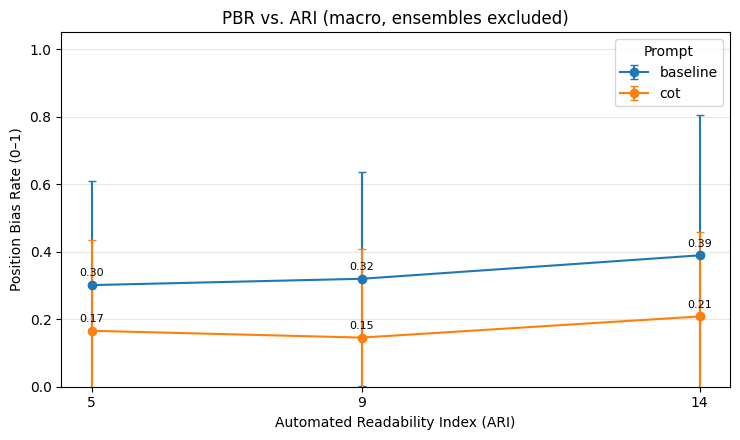

In [106]:
agg_macro = plot_pbr_rq1_overall(df_all, average='macro', include_poll=False,
                                 title="PBR vs. ARI (macro, ensembles excluded)")


In [107]:
def plot_pbr_rq1_overall(
    df,
    *,
    average='macro',
    include_poll=False,
    title="",
    save_pdf_path=None,
    show_ci=False,          # <-- turn off CIs
    connect=False,          # <-- points only if False
    annotate=True
):
    d = df.query("metric_kind == 'rank' and prompt in ['baseline','cot']").copy()
    for c in ['ari','flips_count','n_pairs_strict','swap_flip_rate']:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors='coerce')
    d = d[d['n_pairs_strict'].fillna(0) > 0]

    agg = aggregate_pbr(
        d, by_cols=['prompt','ari'],
        average=average,
        exclude_ensembles=not include_poll
    )

    agg['ari'] = pd.to_numeric(agg['ari'], errors='coerce')
    ari_order = sorted(agg['ari'].dropna().unique().tolist())
    prompts = [p for p in ['baseline','cot'] if p in agg['prompt'].unique()]

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    offset = 0.10  # small x offset so markers don’t overlap
    markers = {'baseline':'o', 'cot':'^'}

    for i, pr in enumerate(prompts):
        sub = agg[agg['prompt'] == pr].set_index('ari').reindex(ari_order)
        y = sub['pbr'].values
        xs = np.array(ari_order) + (i - 0.5) * offset

        if show_ci and {'ci_low','ci_high'}.issubset(sub.columns):
            ylo = sub['ci_low'].values; yhi = sub['ci_high'].values
            ax.errorbar(xs, y, yerr=np.vstack([y - ylo, yhi - y]),
                        fmt='none', capsize=3, alpha=0.7)

        if connect:
            ax.plot(xs, y, marker=markers.get(pr, 'o'), linewidth=1.5, label=pr)
        else:
            ax.scatter(xs, y, s=55, marker=markers.get(pr, 'o'), label=pr, zorder=3)

        if annotate:
            for xi, yi in zip(xs, y):
                if np.isfinite(yi):
                    ax.annotate(f"{yi:.2f}", (xi, yi), textcoords='offset points',
                                xytext=(0, 8), ha='center', fontsize=8)

    avg_tag = "macro (equal judge weight)" if average == 'macro' else "micro (pooled)"
    poll_tag = "incl. PoLL" if include_poll else "excl. PoLL"
    ax.set_title(title or f"PBR vs. ARI — {avg_tag}, {poll_tag}")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()

    if save_pdf_path:
        fig.savefig(save_pdf_path, format="pdf", bbox_inches="tight",
                    pad_inches=0.02, transparent=True)
    plt.show()
    return agg


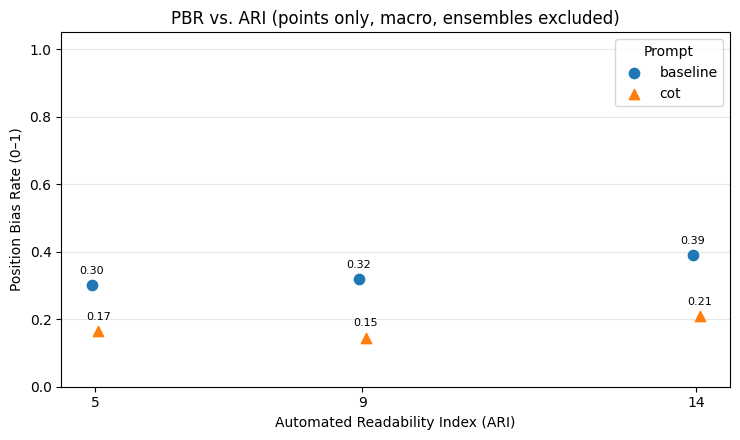

,prompt,ari,pbr,sd,k,ci_low,ci_high
0,baseline,5,0.301126,0.247633,5,-0.006302,0.608553
1,baseline,9,0.319867,0.254889,5,0.003431,0.636303
2,baseline,14,0.389258,0.334337,5,-0.025809,0.804326
3,cot,5,0.165735,0.216914,5,-0.103556,0.435027
4,cot,9,0.145600,0.210717,5,-0.115997,0.407197
5,cot,14,0.208196,0.202641,5,-0.043375,0.459768


In [108]:
plot_pbr_rq1_overall(df_all, average='macro', include_poll=False,
                     show_ci=False, connect=False,
                     title="PBR vs. ARI (points only, macro, ensembles excluded)")


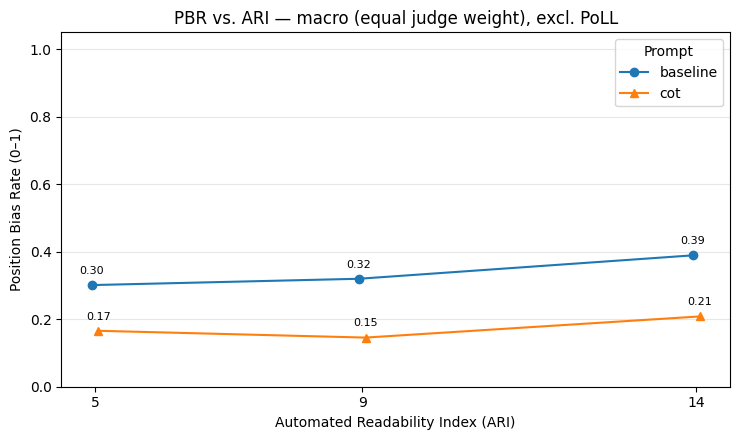

,prompt,ari,pbr,sd,k,ci_low,ci_high
0,baseline,5,0.301126,0.247633,5,-0.006302,0.608553
1,baseline,9,0.319867,0.254889,5,0.003431,0.636303
2,baseline,14,0.389258,0.334337,5,-0.025809,0.804326
3,cot,5,0.165735,0.216914,5,-0.103556,0.435027
4,cot,9,0.145600,0.210717,5,-0.115997,0.407197
5,cot,14,0.208196,0.202641,5,-0.043375,0.459768


In [109]:
plot_pbr_rq1_overall(df_all, average='macro', include_poll=False,
                     show_ci=False, connect=True)


In [94]:
df_all

,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0
1,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0
2,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0
3,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0
4,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
86,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
87,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
88,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0


In [114]:
def plot_pbr_rq1_overall(
    df,
    *,
    average='macro',
    include_poll=False,
    title="",
    save_pdf_path=None,
    show_ci=False,          # keep False for points only
    connect=False,          # keep False for points only
    annotate=True,
    dot_size=55
):
    d = df.query("metric_kind == 'rank' and prompt in ['baseline','cot']").copy()
    for c in ['ari','flips_count','n_pairs_strict','swap_flip_rate']:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors='coerce')
    d = d[d['n_pairs_strict'].fillna(0) > 0]

    agg = aggregate_pbr(
        d, by_cols=['prompt','ari'],
        average=average,
        exclude_ensembles=not include_poll
    )

    agg['ari'] = pd.to_numeric(agg['ari'], errors='coerce')
    ari_order = sorted(agg['ari'].dropna().unique().tolist())
    prompts = [p for p in ['baseline','cot'] if p in agg['prompt'].unique()]

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    offset = 0.10  # small x offset so dots don’t overlap

    for i, pr in enumerate(prompts):
        sub = agg[agg['prompt'] == pr].set_index('ari').reindex(ari_order)
        y = sub['pbr'].values
        xs = np.array(ari_order) + (i - 0.5) * offset

        if show_ci and {'ci_low','ci_high'}.issubset(sub.columns):
            ylo = sub['ci_low'].values; yhi = sub['ci_high'].values
            ax.errorbar(xs, y, yerr=np.vstack([y - ylo, yhi - y]),
                        fmt='none', capsize=3, alpha=0.7)

        if connect:
            ax.plot(xs, y, marker='o', linewidth=1.5, label=pr)  # circle markers
        else:
            ax.scatter(xs, y, s=dot_size, marker='o', label=pr, zorder=3)  # dots only

        if annotate:
            for xi, yi in zip(xs, y):
                if np.isfinite(yi):
                    ax.annotate(f"{yi:.2f}", (xi, yi), textcoords='offset points',
                                xytext=(0, 8), ha='center', fontsize=8)

    avg_tag = "macro (equal judge weight)" if average == 'macro' else "micro (pooled)"
    poll_tag = "incl. PoLL" if include_poll else "excl. PoLL"
    # ax.set_title(title or f"PBR vs. ARI — {avg_tag}, {poll_tag}")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()

    if save_pdf_path:
        fig.savefig(save_pdf_path, format="pdf", bbox_inches="tight",
                    pad_inches=0.02, transparent=True)
    plt.show()
    return agg


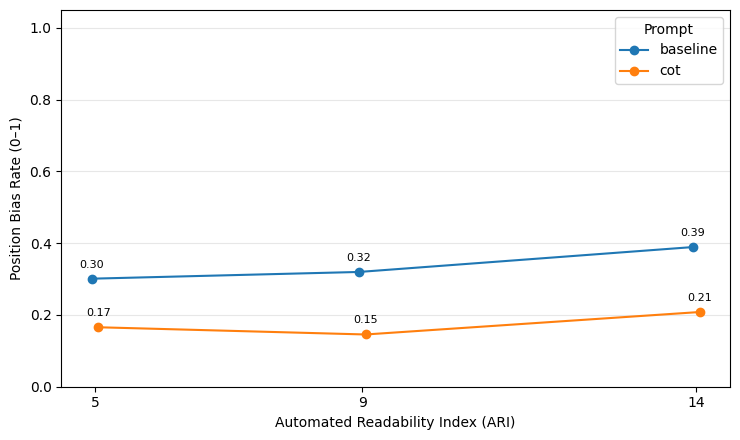

,prompt,ari,pbr,sd,k,ci_low,ci_high
0,baseline,5,0.301126,0.247633,5,-0.006302,0.608553
1,baseline,9,0.319867,0.254889,5,0.003431,0.636303
2,baseline,14,0.389258,0.334337,5,-0.025809,0.804326
3,cot,5,0.165735,0.216914,5,-0.103556,0.435027
4,cot,9,0.145600,0.210717,5,-0.115997,0.407197
5,cot,14,0.208196,0.202641,5,-0.043375,0.459768


In [115]:
plot_pbr_rq1_overall(
    df_all, average='macro', include_poll=False,
    show_ci=False, connect=True,  # dots only
    title=""
)


In [117]:
from __future__ import annotations
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Optional

def compute_pbr_from_frames(
    df_ab: pd.DataFrame,
    df_ba: pd.DataFrame,
    col_item1: str,
    col_item2: str,
    *,
    lower_is_better: bool = True,
    tie_tol: float = 0.0,
    on: Optional[str] = None,
) -> pd.DataFrame:
    """
    Compute Position Bias Rate (PBR) as *pairwise swap-flip rate*.

    A flip occurs if the relative order between the two items changes when positions
    are swapped (AB vs BA). Ties in either order are excluded from the denominator.

    Returns a single-row DataFrame with:
      - swap_flip_rate: flips_count / n_pairs_strict  (float in [0,1] or NaN if no strict pairs)
      - flips_count:     number of flips (int)
      - n_pairs_strict:  number of strict pairs (both orders non-tie) (int)
    """
    # --- align rows ---
    if on is not None:
        merged = pd.merge(
            df_ab[[on, col_item1, col_item2]],
            df_ba[[on, col_item1, col_item2]],
            on=on, suffixes=("_A", "_B"), how="inner", validate="one_to_one"
        )
    else:
        merged = pd.DataFrame({
            f"{col_item1}_A": df_ab[col_item1].to_numpy(),
            f"{col_item2}_A": df_ab[col_item2].to_numpy(),
            f"{col_item1}_B": df_ba[col_item1].to_numpy(),
            f"{col_item2}_B": df_ba[col_item2].to_numpy(),
        })

    # --- coerce numeric; NaN means tie/missing ---
    for c in [f"{col_item1}_A", f"{col_item2}_A", f"{col_item1}_B", f"{col_item2}_B"]:
        merged[c] = pd.to_numeric(merged[c], errors="coerce").astype(float)

    a1 = merged[f"{col_item1}_A"].to_numpy()
    a2 = merged[f"{col_item2}_A"].to_numpy()
    b1 = merged[f"{col_item1}_B"].to_numpy()
    b2 = merged[f"{col_item2}_B"].to_numpy()

    # winner sign for each order: +1 if item1 better, -1 if item2 better, 0 if tie/NaN
    def winner_sign(x1, x2):
        diff = x1 - x2
        if not lower_is_better:
            diff = -diff
        is_tie = np.isnan(x1) | np.isnan(x2) | (np.abs(diff) <= tie_tol)
        sign = np.where(diff < -tie_tol, +1, np.where(diff > tie_tol, -1, 0))
        sign[is_tie] = 0
        return sign

    wA = winner_sign(a1, a2)  # order AB
    wB = winner_sign(b1, b2)  # order BA

    strict = (wA != 0) & (wB != 0)           # both orders make a non-tie decision
    n_strict = int(strict.sum())
    flips = int((wA[strict] != wB[strict]).sum())
    rate = flips / n_strict if n_strict else np.nan

    return pd.DataFrame([{
        "swap_flip_rate": float(rate),
        "flips_count": flips,
        "n_pairs_strict": n_strict,
    }])

def compute_pbr_from_two_files(
    file_ab: str | Path,
    file_ba: str | Path,
    col_item1: str,
    col_item2: str,
    *,
    lower_is_better: bool = True,
    tie_tol: float = 0.0,
    on: Optional[str] = None,
) -> pd.DataFrame:
    df_ab = pd.read_csv(file_ab)
    df_ba = pd.read_csv(file_ba)
    return compute_pbr_from_frames(
        df_ab, df_ba, col_item1, col_item2,
        lower_is_better=lower_is_better, tie_tol=tie_tol, on=on
    )


In [118]:
from typing import List, Dict, Any
import pandas as pd
from pathlib import Path

def build_pbr_summary(cfgs: List[Dict[str, Any]]) -> pd.DataFrame:
    """
    Builds a tidy table with PBR-only fields from a list of configs.
    Each cfg must have: judge, prompt, ari, file_ab, file_ba, item1_col, item2_col.
    Optional: lower_is_better (default True), tie_tol (default 0.0), on (join key or None).
    """
    rows = []
    for cfg in cfgs:
        # skip missing files defensively
        if not (Path(cfg["file_ab"]).exists() and Path(cfg["file_ba"]).exists()):
            continue

        res = compute_pbr_from_two_files(
            file_ab=cfg["file_ab"],
            file_ba=cfg["file_ba"],
            col_item1=cfg["item1_col"],
            col_item2=cfg["item2_col"],
            lower_is_better=cfg.get("lower_is_better", True),
            tie_tol=cfg.get("tie_tol", 0.0),
            on=cfg.get("on", None),
        ).iloc[0].to_dict()

        rows.append({
            "judge": cfg["judge"],
            "prompt": cfg["prompt"],
            "ari": cfg["ari"],
            "metric_kind": "rank",
            "swap_flip_rate": res["swap_flip_rate"],
            "flips_count": int(res["flips_count"]),
            "n_pairs_strict": int(res["n_pairs_strict"]),
        })

    out = pd.DataFrame(rows)
    # stable order for readability
    return out.sort_values(["judge", "prompt", "ari"], ignore_index=True)


In [120]:
# ensure cfgs exists (if not already defined elsewhere)
try:
    new_cfgs
except NameError:
    new_cfgs = []

# (your add_judge calls here, as in your cell)
add_judge(
    new_cfgs,
    judge_label="gpt-3",
    base_dir="../resultFiles/GPT3",
    prefix="gpt3",
    aris=(5, 9, 14),
    on=None,   # set to "pair_id" if both CSVs have it
)

# Add LLaMA (adjust base_dir/prefix to your actual layout: LLAMA, LLAMA3, etc.)
# Example assumes "../resultFiles/LLAMA3/NB/Rank/llama3_ari{ari}_b1.csv" style
add_judge(
    new_cfgs,
    judge_label="llama-3-70b",
    base_dir="../resultFiles/LLama",
    prefix="llama",
    aris=(5, 9, 14),
    on=None,
)


# Build the PBR-only summary
df_all_new = build_pbr_summary(new_cfgs)
display(df_all_new.head())
df_all_new.to_csv("./pbr_summary_all_judges_new.csv", index=False)
print("Saved ./pbr_summary_all_judges_new.csv")


,judge,prompt,ari,metric_kind,swap_flip_rate,flips_count,n_pairs_strict
0,gpt-3,baseline,5,rank,0.539642,211,391
1,gpt-3,baseline,9,rank,0.401535,157,391
2,gpt-3,baseline,14,rank,0.746803,292,391
3,gpt-3,cot,5,rank,0.245524,96,391
4,gpt-3,cot,9,rank,0.176471,69,391


Saved ./pbr_summary_all_judges_new.csv


In [124]:
df_all[25:35]

,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
25,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.0,391.0,391.0
26,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.0,391.0,391.0
27,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.0,391.0,391.0
28,gpt-3,baseline,5,rank,0.539642,0.487540,0.585907,211,0.534527,0.767263,0.994885,0.539642,0.0,391.0,391.0
29,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.0,391.0,391.0
30,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.0,391.0,391.0
31,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.0,391.0,391.0
32,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.0,391.0,391.0
33,gpt-3,baseline,9,rank,0.401535,0.354131,0.450854,157,0.396419,0.698210,0.994885,0.401535,0.0,391.0,391.0
34,gpt-3,baseline,14,rank,0.746803,0.701443,0.787360,292,0.746803,0.873402,0.994885,0.751918,0.0,391.0,391.0


In [125]:
df_all

,judge,prompt,ari,metric_kind,swap_flip_rate,sfr_ci_low,sfr_ci_high,flips_count,position_advantage_index,pos1_win_rate_avg,pos1_win_rate_orderA,pos1_win_rate_orderB,tie_rate_any,n_pairs_strict,n_pairs_total
0,Mistral,baseline,5,rank,0.546392,0.494067,0.592703,212,0.514066,0.757033,0.966752,0.547315,0.007673,388.0,391.0
1,Mistral,baseline,9,rank,0.600515,0.551024,0.648036,233,0.572890,0.786445,0.984655,0.588235,0.007673,388.0,391.0
2,Mistral,baseline,14,rank,0.700767,0.653604,0.744024,274,0.680307,0.840153,0.987212,0.693095,0.000000,391.0,391.0
3,Mistral,cot,5,rank,0.511509,0.462092,0.560702,200,0.491049,0.745524,0.987212,0.503836,0.000000,391.0,391.0
4,Mistral,cot,9,rank,0.501279,0.451948,0.550584,196,0.485934,0.742967,0.992327,0.493606,0.000000,391.0,391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
86,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
87,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0
88,llama-3-70b,cot,14,rank,0.102362,0.075787,0.136875,39,0.094629,0.547315,0.992327,0.102302,0.025575,381.0,391.0


In [25]:
import numpy as np
import pandas as pd

def _wilson_ci(k: int, n: int, z: float = 1.959964):
    if n <= 0:
        return (np.nan, np.nan)
    p = k / n
    denom = 1 + (z*z)/n
    centre = (p + (z*z)/(2*n)) / denom
    half   = z * np.sqrt((p*(1-p) + (z*z)/(4*n)) / n) / denom
    return (max(0.0, centre - half), min(1.0, centre + half))

def dedupe_pbr_minimal(df_all: pd.DataFrame) -> pd.DataFrame:
    KEY = ["judge", "prompt", "ari", "metric_kind"]
    # 1) drop exact duplicates
    d0 = df_all.drop_duplicates().copy()

    # 2) pool by key
    pooled = (
        d0.groupby(KEY, as_index=False)
          .agg(flips_count=("flips_count", "sum"),
               n_pairs_strict=("n_pairs_strict", "sum"))
    )
    pooled["swap_flip_rate"] = pooled["flips_count"] / pooled["n_pairs_strict"]
    lohi = pooled.apply(lambda r: _wilson_ci(int(r.flips_count), int(r.n_pairs_strict)), axis=1)
    pooled["sfr_ci_low"]  = [x[0] for x in lohi]
    pooled["sfr_ci_high"] = [x[1] for x in lohi]
    return pooled

# usage
clean_pbr = dedupe_pbr_minimal(df_all)
print(clean_pbr.shape)


(36, 9)


In [26]:
clean_pbr

,judge,prompt,ari,metric_kind,flips_count,n_pairs_strict,swap_flip_rate,sfr_ci_low,sfr_ci_high
0,Mistral,baseline,5,rank,212,388.0,0.546392,0.496642,0.595232
1,Mistral,baseline,9,rank,233,388.0,0.600515,0.551024,0.648036
2,Mistral,baseline,14,rank,274,391.0,0.700767,0.653604,0.744024
3,Mistral,cot,5,rank,200,391.0,0.511509,0.462092,0.560702
4,Mistral,cot,9,rank,196,391.0,0.501279,0.451948,0.550584
5,Mistral,cot,14,rank,137,391.0,0.350384,0.304758,0.398920
6,PoLL,baseline,5,rank,138,391.0,0.352941,0.307213,0.401530
7,PoLL,baseline,9,rank,105,390.0,0.269231,0.227617,0.315346
8,PoLL,baseline,14,rank,209,391.0,0.534527,0.484989,0.583393
9,PoLL,cot,5,rank,57,391.0,0.145780,0.114249,0.184204


In [44]:
clean_pbr

,judge,prompt,ari,metric_kind,flips_count,n_pairs_strict,swap_flip_rate,sfr_ci_low,sfr_ci_high
0,Mistral,baseline,5,rank,212,388.0,0.546392,0.496642,0.595232
1,Mistral,baseline,9,rank,233,388.0,0.600515,0.551024,0.648036
2,Mistral,baseline,14,rank,274,391.0,0.700767,0.653604,0.744024
3,Mistral,cot,5,rank,200,391.0,0.511509,0.462092,0.560702
4,Mistral,cot,9,rank,196,391.0,0.501279,0.451948,0.550584
5,Mistral,cot,14,rank,137,391.0,0.350384,0.304758,0.398920
6,PoLL,baseline,5,rank,138,391.0,0.352941,0.307213,0.401530
7,PoLL,baseline,9,rank,105,390.0,0.269231,0.227617,0.315346
8,PoLL,baseline,14,rank,209,391.0,0.534527,0.484989,0.583393
9,PoLL,cot,5,rank,57,391.0,0.145780,0.114249,0.184204


In [ ]:
clean_pbr

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ENSEMBLES = {"PoLL"}  # change if you have others

def _maybe_filter_ensembles(df, include_poll: bool):
    return df if include_poll else df[~df["judge"].isin(ENSEMBLES)]

def plot_pbr_overall_from_clean(
    clean_pbr: pd.DataFrame,
    *,
    include_poll: bool = False,   # RQ1 usually False to avoid double counting
    connect: bool = False,        # dots only if False
    annotate: bool = True,
    title: str | None = None,
):
    d = clean_pbr.copy()
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    d = d.dropna(subset=["ari", "swap_flip_rate"])
    d = _maybe_filter_ensembles(d, include_poll)

    # macro average across judges (equal judge weight)
    agg = (d.groupby(["prompt","ari"], as_index=False)
             .agg(pbr=("swap_flip_rate","mean")))

    ari_order = sorted(agg["ari"].unique().tolist())
    prompts = [p for p in ["baseline","cot"] if p in agg["prompt"].unique()]
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    offset = 0.10

    for i, pr in enumerate(prompts):
        sub = agg[agg["prompt"] == pr].set_index("ari").reindex(ari_order)
        y = sub["pbr"].values
        xs = np.array(ari_order) + (i - 0.5) * offset

        if connect:
            ax.plot(xs, y, marker="o", linewidth=1.5, label=pr)
        else:
            ax.scatter(xs, y, s=55, marker="o", label=pr, zorder=3)

        if annotate:
            for xi, yi in zip(xs, y):
                if np.isfinite(yi):
                    ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                                xytext=(0, 8), ha="center", fontsize=8)

    tag = "incl. PoLL" if include_poll else "excl. PoLL"
    ax.set_title(title or f"PBR vs ARI — macro average ({tag})")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis="y", alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()
    plt.show()
    return agg  # return the aggregated table we actually plotted

def summarize_counts(clean_pbr: pd.DataFrame, *, include_poll: bool = True):
    """
    Returns two tables:
      1) per-prompt per-ARI totals (sum flips, sum pairs, pooled PBR)
      2) overall per-ARI totals (summing across prompts)
    """
    d = clean_pbr.copy()
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    d = d.dropna(subset=["ari"])
    d = _maybe_filter_ensembles(d, include_poll)

    by_prompt_ari = (d.groupby(["prompt","ari"], as_index=False)
       .agg(flips_total=("flips_count","sum"),
            pairs_total=("n_pairs_strict","sum")))
    by_prompt_ari["pbr_pooled"] = by_prompt_ari["flips_total"] / by_prompt_ari["pairs_total"]

    by_ari = (d.groupby(["ari"], as_index=False)
       .agg(flips_total=("flips_count","sum"),
            pairs_total=("n_pairs_strict","sum")))
    by_ari["pbr_pooled"] = by_ari["flips_total"] / by_ari["pairs_total"]

    return by_prompt_ari.sort_values(["prompt","ari"]), by_ari.sort_values("ari")


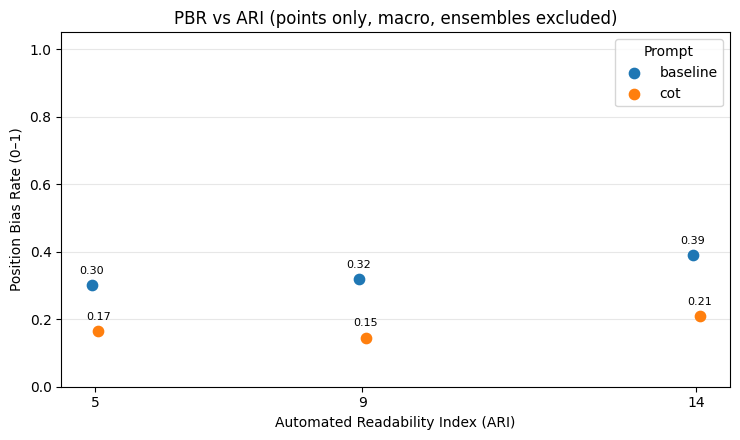

Per-prompt ARI totals:
      prompt  ari  flips_total  pairs_total  pbr_pooled
0  baseline    5          725       2340.0    0.309829
1  baseline    9          728       2339.0    0.311244
2  baseline   14          970       2346.0    0.413470
3       cot    5          381       2291.0    0.166303
4       cot    9          324       2312.0    0.140138
5       cot   14          496       2336.0    0.212329

Overall ARI totals (pooled across prompts):
    ari  flips_total  pairs_total  pbr_pooled
0    5         1106       4631.0    0.238825
1    9         1052       4651.0    0.226188
2   14         1466       4682.0    0.313114


In [28]:
# 1) Plot dots-only, macro-average across judges, excluding PoLL (good for RQ1)
agg_macro = plot_pbr_overall_from_clean(
    clean_pbr,
    include_poll=False,
    connect=False,   # dots-only
    annotate=True,
    title="PBR vs ARI (points only, macro, ensembles excluded)"
)

# 2) Get counts per ARI (flips and n_pairs_strict), both per prompt and overall
per_prompt, overall = summarize_counts(clean_pbr, include_poll=True)  # set False to exclude PoLL
print("Per-prompt ARI totals:\n", per_prompt)
print("\nOverall ARI totals (pooled across prompts):\n", overall)


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ENSEMBLES = {"PoLL"}  # change if you have others

def _maybe_filter_ensembles(df, include_poll: bool):
    return df if include_poll else df[~df["judge"].isin(ENSEMBLES)]

def plot_pbr_overall_from_clean(
    clean_pbr: pd.DataFrame,
    *,
    include_poll: bool = False,   # RQ1 usually False to avoid double counting
    connect: bool = False,        # dots only if False
    annotate: bool = True,
    title: str | None = None,
):
    d = clean_pbr.copy()
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    d = d.dropna(subset=["ari", "swap_flip_rate"])
    d = _maybe_filter_ensembles(d, include_poll)

    # macro average across judges (equal judge weight)
    agg = (d.groupby(["prompt","ari"], as_index=False)
             .agg(pbr=("swap_flip_rate","mean")))

    ari_order = sorted(agg["ari"].unique().tolist())
    prompts = [p for p in ["baseline","cot"] if p in agg["prompt"].unique()]
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    offset = 0.10

    for i, pr in enumerate(prompts):
        sub = agg[agg["prompt"] == pr].set_index("ari").reindex(ari_order)
        y = sub["pbr"].values
        xs = np.array(ari_order) + (i - 0.5) * offset

        if connect:
            ax.plot(xs, y, marker="o", linewidth=1.5, label=pr)
        else:
            ax.scatter(xs, y, s=55, marker="o", label=pr, zorder=3)

        if annotate:
            for xi, yi in zip(xs, y):
                if np.isfinite(yi):
                    ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                                xytext=(0, 8), ha="center", fontsize=8)

    tag = "incl. PoLL" if include_poll else "excl. PoLL"
    ax.set_title(title or f"PBR vs ARI — macro average ({tag})")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis="y", alpha=0.3)
    ax.legend(title="Prompt")
    plt.tight_layout()
    plt.show()
    return agg  # return the aggregated table we actually plotted

def summarize_counts(clean_pbr: pd.DataFrame, *, include_poll: bool = True):
    """
    Returns two tables:
      1) per-prompt per-ARI totals (sum flips, sum pairs, pooled PBR)
      2) overall per-ARI totals (summing across prompts)
    """
    d = clean_pbr.copy()
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    d = d.dropna(subset=["ari"])
    d = _maybe_filter_ensembles(d, include_poll)

    by_prompt_ari = (d.groupby(["prompt","ari"], as_index=False)
       .agg(flips_total=("flips_count","sum"),
            pairs_total=("n_pairs_strict","sum")))
    by_prompt_ari["pbr_pooled"] = by_prompt_ari["flips_total"] / by_prompt_ari["pairs_total"]

    by_ari = (d.groupby(["ari"], as_index=False)
       .agg(flips_total=("flips_count","sum"),
            pairs_total=("n_pairs_strict","sum")))
    by_ari["pbr_pooled"] = by_ari["flips_total"] / by_ari["pairs_total"]

    return by_prompt_ari.sort_values(["prompt","ari"]), by_ari.sort_values("ari")


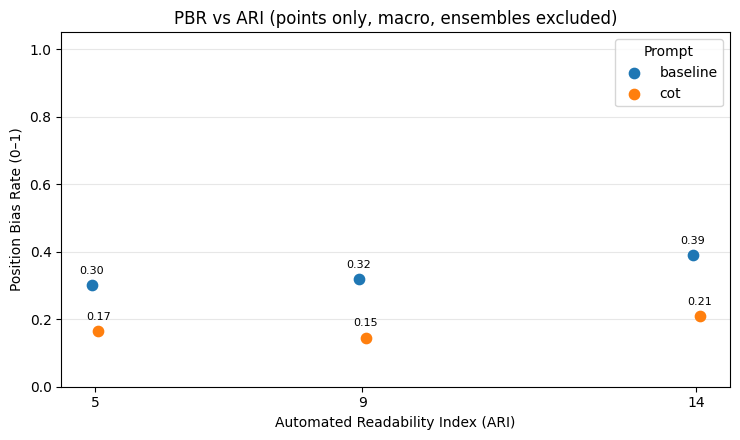

Per-prompt ARI totals:
      prompt  ari  flips_total  pairs_total  pbr_pooled
0  baseline    5          725       2340.0    0.309829
1  baseline    9          728       2339.0    0.311244
2  baseline   14          970       2346.0    0.413470
3       cot    5          381       2291.0    0.166303
4       cot    9          324       2312.0    0.140138
5       cot   14          496       2336.0    0.212329

Overall ARI totals (pooled across prompts):
    ari  flips_total  pairs_total  pbr_pooled
0    5         1106       4631.0    0.238825
1    9         1052       4651.0    0.226188
2   14         1466       4682.0    0.313114


In [131]:
# 1) Plot dots-only, macro-average across judges, excluding PoLL (good for RQ1)
agg_macro = plot_pbr_overall_from_clean(
    clean_pbr,
    include_poll=False,
    connect=False,   # dots-only
    annotate=True,
    title="PBR vs ARI (points only, macro, ensembles excluded)"
)

# 2) Get counts per ARI (flips and n_pairs_strict), both per prompt and overall
per_prompt, overall = summarize_counts(clean_pbr, include_poll=True)  # set False to exclude PoLL
print("Per-prompt ARI totals:\n", per_prompt)
print("\nOverall ARI totals (pooled across prompts):\n", overall)


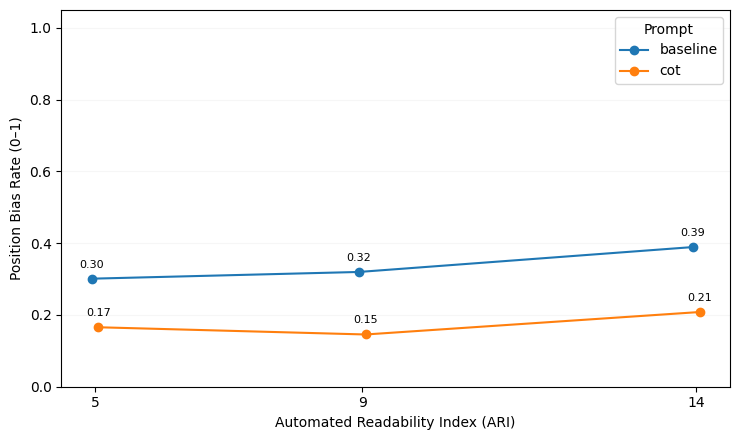

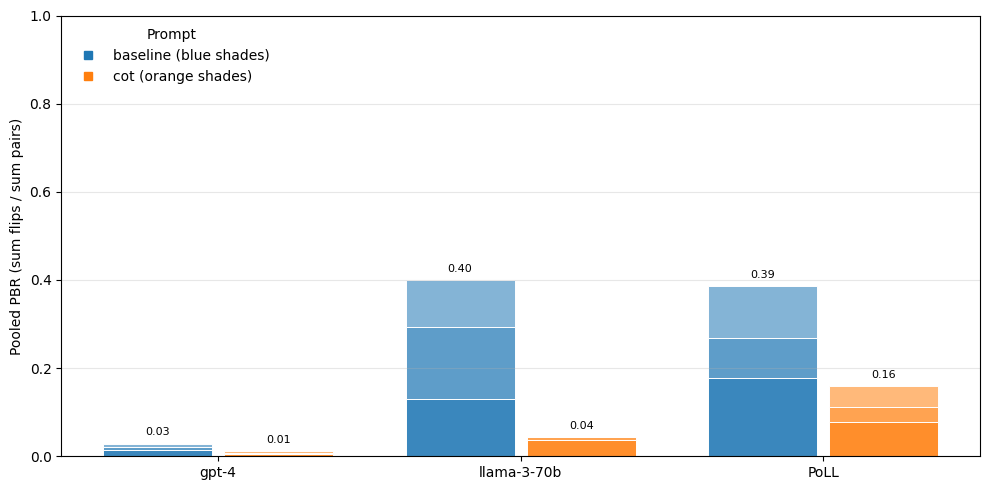

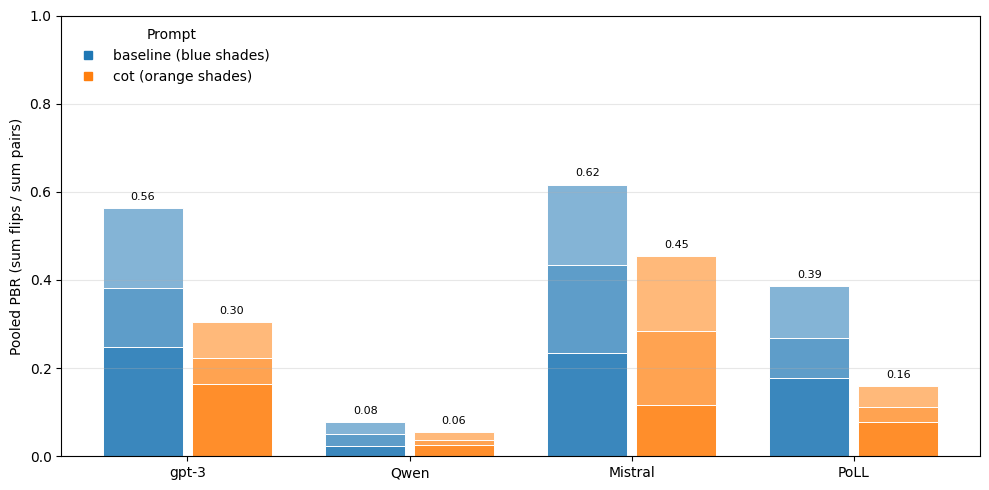

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

# --- helpers ---
ENSEMBLES = {"PoLL"}

def _filter_models(df, models, include_poll=True):
    d = df.copy()
    if not include_poll:
        d = d[~d["judge"].isin(ENSEMBLES)]
    if models is not None:
        d = d[d["judge"].isin(models)]
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    return d.dropna(subset=["ari", "swap_flip_rate"])

def _lighten(color_hex, factor):
    # factor in [0,1]; higher -> lighter
    r,g,b = to_rgb(color_hex)
    return (1 - factor) + factor*np.array([r,g,b])

def _shade_series(base_hex):
    # darkest for ARI 14, mid for 9, light for 5 (consistent visual ordering)
    return {
        14: _lighten(base_hex, 0.88),
        9:  _lighten(base_hex, 0.72),
        5:  _lighten(base_hex, 0.55),
    }

BASELINE_COLOR = "#1f77b4"  # blue
COT_COLOR      = "#ff7f0e"  # orange
BASELINE_SHADES = _shade_series(BASELINE_COLOR)
COT_SHADES      = _shade_series(COT_COLOR)

# =============== 1) Connected points plot (baseline vs CoT) ===============
def plot_pbr_overall_connected(clean_pbr, *, include_poll=False, title=None):
    d = _filter_models(clean_pbr, models=None, include_poll=include_poll)
    # macro-average across judges (equal weight per judge)
    agg = (d.groupby(["prompt","ari"], as_index=False)
             .agg(pbr=("swap_flip_rate","mean")))
    ari_order = sorted(agg["ari"].unique().tolist())
    prompts = [p for p in ["baseline","cot"] if p in agg["prompt"].unique()]

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    offset = 0.10
    color_map = {"baseline": BASELINE_COLOR, "cot": COT_COLOR}

    for i, pr in enumerate(prompts):
        sub = agg[agg["prompt"] == pr].set_index("ari").reindex(ari_order)
        y = sub["pbr"].values
        xs = np.array(ari_order) + (i - 0.5) * offset
        ax.plot(xs, y, marker="o", linewidth=1.5, label=pr, color=color_map[pr])
        # annotate
        for xi, yi in zip(xs, y):
            if np.isfinite(yi):
                ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                            xytext=(0, 8), ha="center", fontsize=8)

    tag = "incl. PoLL" if include_poll else "excl. PoLL"
    ax.set_title(title or f"")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis="y", alpha=0.1)
    ax.legend(title="Prompt")
    plt.tight_layout()
    plt.savefig("pbr_overall_connected.pdf")
    plt.show()
    return agg

# =============== 2) Stacked bars by model groups ==========================
def _prep_stacked_table(clean_pbr, models, *, include_poll=True, ari_levels=(14,9,5)):
    """
    For each (model, prompt), bar height = pooled PBR across these ARIs:
       height = sum(flips) / sum(pairs)
    Segment (stack) for ARI a has height = flips_a / sum(pairs_all).
    """
    d = _filter_models(clean_pbr, models=models, include_poll=include_poll)
    # keep only requested ARIs (and ensure ints)
    d = d[d["ari"].isin(ari_levels)]
    d["ari"] = d["ari"].astype(int)

    # compute totals per (judge, prompt)
    totals = (d.groupby(["judge","prompt"], as_index=False)
                .agg(flips_total=("flips_count","sum"),
                     pairs_total=("n_pairs_strict","sum")))
    # per-ARI flips for segments
    per_ari = (d.groupby(["judge","prompt","ari"], as_index=False)
                 .agg(flips=("flips_count","sum"),
                      pairs=("n_pairs_strict","sum")))

    merged = per_ari.merge(totals, on=["judge","prompt"], how="left")
    merged["segment_height"] = merged["flips"] / merged["pairs_total"]  # flips_a / sum_pairs
    # bar (total height) for diagnostics
    bar_heights = (merged.groupby(["judge","prompt"], as_index=False)
                         .agg(bar_height=("segment_height","sum")))
    merged = merged.merge(bar_heights, on=["judge","prompt"], how="left")
    return merged, bar_heights

def plot_stacked_bars_group(clean_pbr, models, *, include_poll=True, title=None):
    merged, bars = _prep_stacked_table(clean_pbr, models, include_poll=include_poll)

    judges = list(dict.fromkeys(models))  # preserve order
    prompts = [p for p in ["baseline","cot"] if p in merged["prompt"].unique()]
    ari_levels = [14, 9, 5]  # order of stacks (dark->light)

    # x positions: per-judge 2 bars (baseline, cot)
    x = np.arange(len(judges))
    width = 0.36
    fig, ax = plt.subplots(figsize=(max(7.5, 10), 5.0))

    for i, pr in enumerate(prompts):
        base_x = x + (i - 0.5) * (width + 0.04)
        bottoms = np.zeros_like(base_x, dtype=float)

        for ari in ari_levels:
            seg = merged[(merged["prompt"] == pr) & (merged["ari"] == ari)]
            seg = seg.set_index("judge").reindex(judges).fillna(0.0)
            h = seg["segment_height"].values
            color = BASELINE_SHADES[ari] if pr == "baseline" else COT_SHADES[ari]
            ax.bar(base_x, h, width=width, bottom=bottoms, label=f"{pr}·ARI{ari}" if i==0 and ari==ari_levels[0] else None,
                   color=color, edgecolor="white", linewidth=0.7)
            bottoms = bottoms + h

        # annotate total bar height (pooled PBR)
        bh = bars[bars["prompt"] == pr].set_index("judge").reindex(judges)["bar_height"].values
        for xi, yi in zip(base_x, bh):
            if np.isfinite(yi):
                ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                            xytext=(0, 6), ha="center", fontsize=8)

    ax.set_xticks(x)
    ax.set_xticklabels(judges, rotation=0)
    ax.set_ylabel("Pooled PBR (sum flips / sum pairs)")
    ax.set_ylim(0, 1.0)
    ax.grid(axis="y", alpha=0.3)

    # Custom legend: two entries (prompt) + stacked ARI hint
    from matplotlib.lines import Line2D
    legend_items = [
        Line2D([0],[0], marker='s', linestyle='None', color=BASELINE_COLOR, label='baseline (blue shades)'),
        Line2D([0],[0], marker='s', linestyle='None', color=COT_COLOR,      label='cot (orange shades)'),
    ]
    ax.legend(handles=legend_items, loc="upper left", frameon=False, title="Prompt")
    ax.set_title(title or "")
    plt.tight_layout()
    plt.show()

# ----------------- USAGE -----------------

# 1) Connected points (macro average), exclude PoLL for RQ1-style overall
plot_pbr_overall_connected(clean_pbr, include_poll=False,
                           title="")

# 2) Stacked bars for group A: gpt-4, llama-3-70b, PoLL
group_A = ["gpt-4", "llama-3-70b", "PoLL"]
plot_stacked_bars_group(clean_pbr, group_A, include_poll=True,
                        title="")

# 3) Stacked bars for group B: gpt-3 (or 'gpt-3.5' if that’s your label), Qwen, Mistral, PoLL
#    If your label is 'gpt-3.5', change below accordingly.
group_B = ["gpt-3", "Qwen", "Mistral", "PoLL"]
plot_stacked_bars_group(clean_pbr, group_B, include_poll=True,
                        title="")


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

# --- helpers ---
ENSEMBLES = {"PoLL"}

def _filter_models(df, models, include_poll=True):
    d = df.copy()
    if not include_poll:
        d = d[~d["judge"].isin(ENSEMBLES)]
    if models is not None:
        d = d[d["judge"].isin(models)]
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    return d.dropna(subset=["ari", "swap_flip_rate"])

def _lighten(color_hex, factor):
    # factor in [0,1]; higher -> lighter
    r,g,b = to_rgb(color_hex)
    return (1 - factor) + factor*np.array([r,g,b])

def _shade_series(base_hex):
    # darkest for ARI 14, mid for 9, light for 5 (consistent visual ordering)
    return {
        14: _lighten(base_hex, 0.88),
        9:  _lighten(base_hex, 0.72),
        5:  _lighten(base_hex, 0.55),
    }

BASELINE_COLOR = "#1f77b4"  # blue
COT_COLOR      = "#ff7f0e"  # orange
BASELINE_SHADES = _shade_series(BASELINE_COLOR)
COT_SHADES      = _shade_series(COT_COLOR)

# =============== 1) Connected points plot (baseline vs CoT) ===============
def plot_pbr_overall_connected(clean_pbr, *, include_poll=False, title=None):
    d = _filter_models(clean_pbr, models=None, include_poll=include_poll)
    # macro-average across judges (equal weight per judge)
    agg = (d.groupby(["prompt","ari"], as_index=False)
             .agg(pbr=("swap_flip_rate","mean")))
    ari_order = sorted(agg["ari"].unique().tolist())
    prompts = [p for p in ["baseline","cot"] if p in agg["prompt"].unique()]

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    offset = 0.10
    color_map = {"baseline": BASELINE_COLOR, "cot": COT_COLOR}

    for i, pr in enumerate(prompts):
        sub = agg[agg["prompt"] == pr].set_index("ari").reindex(ari_order)
        y = sub["pbr"].values
        xs = np.array(ari_order) + (i - 0.5) * offset
        ax.plot(xs, y, marker="o", linewidth=1.5, label=pr, color=color_map[pr])
        # annotate
        for xi, yi in zip(xs, y):
            if np.isfinite(yi):
                ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                            xytext=(0, 8), ha="center", fontsize=8)

    tag = "incl. PoLL" if include_poll else "excl. PoLL"
    ax.set_title(title or f"")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis="y", alpha=0.1)
    ax.legend(title="Prompt")
    plt.tight_layout()
    plt.savefig("pbr_overall_connected.pdf")
    plt.show()
    return agg

# =============== 2) Stacked bars by model groups ==========================
def _prep_stacked_table(clean_pbr, models, *, include_poll=True, ari_levels=(14,9,5)):
    """
    For each (model, prompt), bar height = pooled PBR across these ARIs:
       height = sum(flips) / sum(pairs)
    Segment (stack) for ARI a has height = flips_a / sum(pairs_all).
    """
    d = _filter_models(clean_pbr, models=models, include_poll=include_poll)
    # keep only requested ARIs (and ensure ints)
    d = d[d["ari"].isin(ari_levels)]
    d["ari"] = d["ari"].astype(int)

    # compute totals per (judge, prompt)
    totals = (d.groupby(["judge","prompt"], as_index=False)
                .agg(flips_total=("flips_count","sum"),
                     pairs_total=("n_pairs_strict","sum")))
    # per-ARI flips for segments
    per_ari = (d.groupby(["judge","prompt","ari"], as_index=False)
                 .agg(flips=("flips_count","sum"),
                      pairs=("n_pairs_strict","sum")))

    merged = per_ari.merge(totals, on=["judge","prompt"], how="left")
    merged["segment_height"] = merged["flips"] / merged["pairs_total"]  # flips_a / sum_pairs
    # bar (total height) for diagnostics
    bar_heights = (merged.groupby(["judge","prompt"], as_index=False)
                         .agg(bar_height=("segment_height","sum")))
    merged = merged.merge(bar_heights, on=["judge","prompt"], how="left")
    return merged, bar_heights

def plot_stacked_bars_group(clean_pbr, models, *, include_poll=True, title=None):
    merged, bars = _prep_stacked_table(clean_pbr, models, include_poll=include_poll)

    judges = list(dict.fromkeys(models))  # preserve order
    prompts = [p for p in ["baseline","cot"] if p in merged["prompt"].unique()]
    ari_levels = [14, 9, 5]  # order of stacks (dark->light)

    # x positions: per-judge 2 bars (baseline, cot)
    x = np.arange(len(judges))
    width = 0.36
    fig, ax = plt.subplots(figsize=(max(7.5, 10), 5.0))

    for i, pr in enumerate(prompts):
        base_x = x + (i - 0.5) * (width + 0.04)
        bottoms = np.zeros_like(base_x, dtype=float)

        for ari in ari_levels:
            seg = merged[(merged["prompt"] == pr) & (merged["ari"] == ari)]
            seg = seg.set_index("judge").reindex(judges).fillna(0.0)
            h = seg["segment_height"].values
            color = BASELINE_SHADES[ari] if pr == "baseline" else COT_SHADES[ari]
            ax.bar(base_x, h, width=width, bottom=bottoms, label=f"{pr}·ARI{ari}" if i==0 and ari==ari_levels[0] else None,
                   color=color, edgecolor="white", linewidth=0.7)
            bottoms = bottoms + h

        # annotate total bar height (pooled PBR)
        bh = bars[bars["prompt"] == pr].set_index("judge").reindex(judges)["bar_height"].values
        for xi, yi in zip(base_x, bh):
            if np.isfinite(yi):
                ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                            xytext=(0, 6), ha="center", fontsize=8)

    ax.set_xticks(x)
    ax.set_xticklabels(judges, rotation=0)
    ax.set_ylabel("Pooled PBR (sum flips / sum pairs)")
    ax.set_ylim(0, 1.0)
    ax.grid(axis="y", alpha=0.3)

    # Custom legend: two entries (prompt) + stacked ARI hint
    from matplotlib.lines import Line2D
    legend_items = [
        Line2D([0],[0], marker='s', linestyle='None', color=BASELINE_COLOR, label='baseline (blue shades)'),
        Line2D([0],[0], marker='s', linestyle='None', color=COT_COLOR,      label='cot (orange shades)'),
    ]
    ax.legend(handles=legend_items, loc="upper left", frameon=False, title="Prompt")
    ax.set_title(title or "")
    plt.tight_layout()
    plt.show()

# ----------------- USAGE -----------------

# 1) Connected points (macro average), exclude PoLL for RQ1-style overall
plot_pbr_overall_connected(clean_pbr, include_poll=False,
                           title="")

# 2) Stacked bars for group A: gpt-4, llama-3-70b, PoLL
group_A = ["gpt-4", "llama-3-70b", "PoLL"]
plot_stacked_bars_group(clean_pbr, group_A, include_poll=True,
                        title="")

# 3) Stacked bars for group B: gpt-3 (or 'gpt-3.5' if that’s your label), Qwen, Mistral, PoLL
#    If your label is 'gpt-3.5', change below accordingly.
group_B = ["gpt-3", "Qwen", "Mistral", "PoLL"]
plot_stacked_bars_group(clean_pbr, group_B, include_poll=True,
                        title="")


NameError: name 'clean_pbr' is not defined

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

# --- helpers ---
ENSEMBLES = {"PoLL"}

def _filter_models(df, models, include_poll=True):
    d = df.copy()
    if not include_poll:
        d = d[~d["judge"].isin(ENSEMBLES)]
    if models is not None:
        d = d[d["judge"].isin(models)]
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    return d.dropna(subset=["ari", "swap_flip_rate"])

def _lighten(color_hex, factor):
    # factor in [0,1]; higher -> lighter
    r,g,b = to_rgb(color_hex)
    return (1 - factor) + factor*np.array([r,g,b])

def _shade_series(base_hex):
    # darkest for ARI 14, mid for 9, light for 5 (consistent visual ordering)
    return {
        14: _lighten(base_hex, 0.88),
        9:  _lighten(base_hex, 0.72),
        5:  _lighten(base_hex, 0.55),
    }

BASELINE_COLOR = "#1f77b4"  # blue
COT_COLOR      = "#ff7f0e"  # orange
BASELINE_SHADES = _shade_series(BASELINE_COLOR)
COT_SHADES      = _shade_series(COT_COLOR)

# =============== 1) Connected points plot (baseline vs CoT) ===============
def plot_pbr_overall_connected(clean_pbr, *, include_poll=False, title=None):
    d = _filter_models(clean_pbr, models=None, include_poll=include_poll)
    # macro-average across judges (equal weight per judge)
    agg = (d.groupby(["prompt","ari"], as_index=False)
             .agg(pbr=("swap_flip_rate","mean")))
    ari_order = sorted(agg["ari"].unique().tolist())
    prompts = [p for p in ["baseline","cot"] if p in agg["prompt"].unique()]

    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    offset = 0.10
    color_map = {"baseline": BASELINE_COLOR, "cot": COT_COLOR}

    for i, pr in enumerate(prompts):
        sub = agg[agg["prompt"] == pr].set_index("ari").reindex(ari_order)
        y = sub["pbr"].values
        xs = np.array(ari_order) + (i - 0.5) * offset
        ax.plot(xs, y, marker="o", linewidth=1.5, label=pr, color=color_map[pr])
        # annotate
        for xi, yi in zip(xs, y):
            if np.isfinite(yi):
                ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                            xytext=(0, 8), ha="center", fontsize=8)

    tag = "incl. PoLL" if include_poll else "excl. PoLL"
    ax.set_title(title or f"")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis="y", alpha=0.1)
    ax.legend(title="Prompt")
    plt.tight_layout()
    plt.show()
    return agg

# =============== 2) Stacked bars by model groups ==========================
def _prep_stacked_table(clean_pbr, models, *, include_poll=True, ari_levels=(14,9,5)):
    """
    For each (model, prompt), bar height = pooled PBR across these ARIs:
       height = sum(flips) / sum(pairs)
    Segment (stack) for ARI a has height = flips_a / sum(pairs_all).
    """
    d = _filter_models(clean_pbr, models=models, include_poll=include_poll)
    # keep only requested ARIs (and ensure ints)
    d = d[d["ari"].isin(ari_levels)]
    d["ari"] = d["ari"].astype(int)

    # compute totals per (judge, prompt)
    totals = (d.groupby(["judge","prompt"], as_index=False)
                .agg(flips_total=("flips_count","sum"),
                     pairs_total=("n_pairs_strict","sum")))
    # per-ARI flips for segments
    per_ari = (d.groupby(["judge","prompt","ari"], as_index=False)
                 .agg(flips=("flips_count","sum"),
                      pairs=("n_pairs_strict","sum")))

    merged = per_ari.merge(totals, on=["judge","prompt"], how="left")
    merged["segment_height"] = merged["flips"] / merged["pairs_total"]  # flips_a / sum_pairs
    # bar (total height) for diagnostics
    bar_heights = (merged.groupby(["judge","prompt"], as_index=False)
                         .agg(bar_height=("segment_height","sum")))
    merged = merged.merge(bar_heights, on=["judge","prompt"], how="left")
    return merged, bar_heights

def plot_stacked_bars_group(clean_pbr, models, *, include_poll=True, title=None):
    merged, bars = _prep_stacked_table(clean_pbr, models, include_poll=include_poll)

    judges = list(dict.fromkeys(models))  # preserve order
    prompts = [p for p in ["baseline","cot"] if p in merged["prompt"].unique()]
    ari_levels = [14, 9, 5]  # order of stacks (dark->light)

    # x positions: per-judge 2 bars (baseline, cot)
    x = np.arange(len(judges))
    width = 0.36
    fig, ax = plt.subplots(figsize=(max(7.5, 2.5*len(judges)), 5.0))

    for i, pr in enumerate(prompts):
        base_x = x + (i - 0.5) * (width + 0.04)
        bottoms = np.zeros_like(base_x, dtype=float)

        for ari in ari_levels:
            seg = merged[(merged["prompt"] == pr) & (merged["ari"] == ari)]
            seg = seg.set_index("judge").reindex(judges).fillna(0.0)
            h = seg["segment_height"].values
            color = BASELINE_SHADES[ari] if pr == "baseline" else COT_SHADES[ari]
            ax.bar(base_x, h, width=width, bottom=bottoms, label=f"{pr}·ARI{ari}" if i==0 and ari==ari_levels[0] else None,
                   color=color, edgecolor="white", linewidth=0.7)
            bottoms = bottoms + h

        # annotate total bar height (pooled PBR)
        bh = bars[bars["prompt"] == pr].set_index("judge").reindex(judges)["bar_height"].values
        for xi, yi in zip(base_x, bh):
            if np.isfinite(yi):
                ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                            xytext=(0, 6), ha="center", fontsize=8)

    ax.set_xticks(x)
    ax.set_xticklabels(judges, rotation=0)
    ax.set_ylabel("Pooled PBR (sum flips / sum pairs)")
    ax.set_ylim(0, 1.0)
    ax.grid(axis="y", alpha=0.3)

    # Custom legend: two entries (prompt) + stacked ARI hint
    from matplotlib.lines import Line2D
    legend_items = [
        Line2D([0],[0], marker='s', linestyle='None', color=BASELINE_COLOR, label='baseline (blue shades)'),
        Line2D([0],[0], marker='s', linestyle='None', color=COT_COLOR,      label='cot (orange shades)'),
    ]
    ax.legend(handles=legend_items, loc="upper left", frameon=False, title="Prompt")
    ax.set_title(title or "Stacked PBR by Model (segments = ARI 14/9/5)")
    plt.tight_layout()
    plt.show()

# ----------------- USAGE -----------------

# 1) Connected points (macro average), exclude PoLL for RQ1-style overall
plot_pbr_overall_connected(clean_pbr, include_poll=False,
                           title="")

# 2) Stacked bars for group A: gpt-4, llama-3-70b, PoLL
group_A = ["gpt-4", "llama-3-70b", "PoLL"]
plot_stacked_bars_group(clean_pbr, group_A, include_poll=True,
                        title="Stacked PBR — GPT-4 / Llama-3-70B / PoLL")

# 3) Stacked bars for group B: gpt-3 (or 'gpt-3.5' if that’s your label), Qwen, Mistral, PoLL
#    If your label is 'gpt-3.5', change below accordingly.
group_B = ["gpt-3", "Qwen", "Mistral", "PoLL"]
plot_stacked_bars_group(clean_pbr, group_B, include_poll=True,
                        title="Stacked PBR — GPT-3 / Qwen / Mistral / PoLL")


NameError: name 'clean_pbr' is not defined

In [41]:
from matplotlib.patches import Patch
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Optional

def plot_stacked_bars_group(
    clean_pbr,
    models,
    *,
    include_poll: bool = True,
    title: Optional[str] = None,
    show_ari_legend: bool = True,
    annotate_segments: bool = False,
    display_map: Optional[Dict[str, str]] = None,   # <-- NEW
    save_name="save_fig.pdf"
):
    merged, bars = _prep_stacked_table(clean_pbr, models, include_poll=include_poll)

    judges  = list(dict.fromkeys(models))
    prompts = [p for p in ["baseline","cot"] if p in merged["prompt"].unique()]
    ari_levels = [14, 9, 5]  # dark -> light

    # build pretty labels
    if display_map is None:
        display_map = {}
    xtick_labels = [display_map.get(j, j) for j in judges]

    x = np.arange(len(judges))
    width = 0.36
    fig, ax = plt.subplots(figsize=(max(7.5, 10), 5.0))

    for i, pr in enumerate(prompts):
        base_x  = x + (i - 0.5) * (width + 0.04)
        bottoms = np.zeros_like(base_x, dtype=float)

        for ari in ari_levels:
            seg = merged[(merged["prompt"] == pr) & (merged["ari"] == ari)]
            seg = seg.set_index("judge").reindex(judges).fillna(0.0)
            h   = seg["segment_height"].values
            color = BASELINE_SHADES[ari] if pr == "baseline" else COT_SHADES[ari]

            ax.bar(
                base_x, h, width=width, bottom=bottoms,
                color=color, edgecolor="none", linewidth=0, antialiased=False
            )
            bottoms = np.round(bottoms + h, 12)

        # annotate pooled PBR
        bh = bars[bars["prompt"] == pr].set_index("judge").reindex(judges)["bar_height"].values
        for xi, yi in zip(base_x, bh):
            if np.isfinite(yi):
                ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                            xytext=(0, 6), ha="center", fontsize=8,fontweight  = "bold")

    ax.set_xticks(x)
    ax.set_xticklabels(xtick_labels)   # <-- pretty names here
    ax.set_ylabel("Pooled PBR (sum flips / sum pairs)")
    ax.set_ylim(0, 1.0)
    ax.grid(axis="y", alpha=0.15)
    ax.set_title(title or "")

    # legends (prompt + ARI)
    prompt_handles = [
        Patch(facecolor=BASELINE_COLOR, label="baseline"),
        Patch(facecolor=COT_COLOR,      label="cot"),
    ]
    leg1 = ax.legend(handles=prompt_handles, title="Prompt", loc="upper left", frameon=False)
    ax.add_artist(leg1)

    if show_ari_legend:
        ari_handles = [
            Patch(facecolor=BASELINE_SHADES[5],  label="ARI 5"),
            Patch(facecolor=BASELINE_SHADES[9],  label="ARI 9"),
            Patch(facecolor=BASELINE_SHADES[14], label="ARI 14"),
        ]
        ax.legend(handles=ari_handles, title="ARI level (shade)", loc="upper right", frameon=False)

    plt.tight_layout()
    plt.savefig(save_name)
    plt.show()


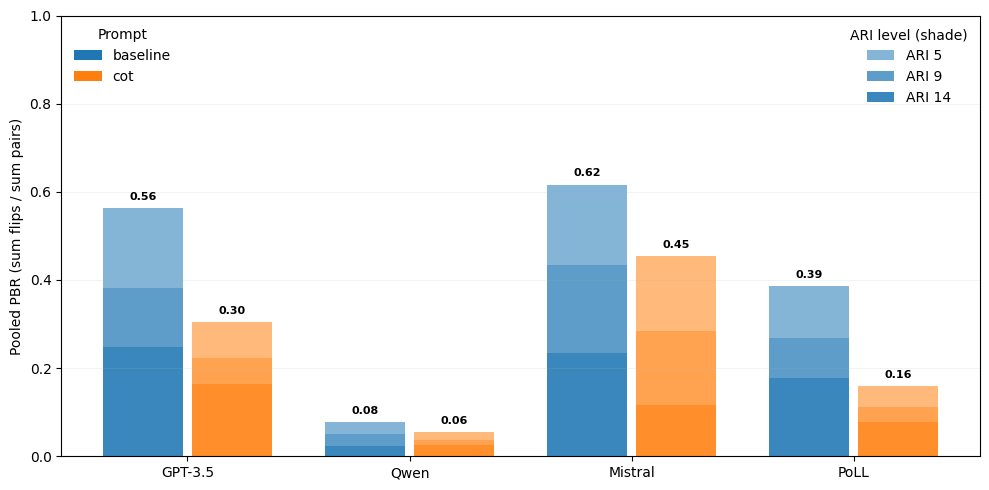

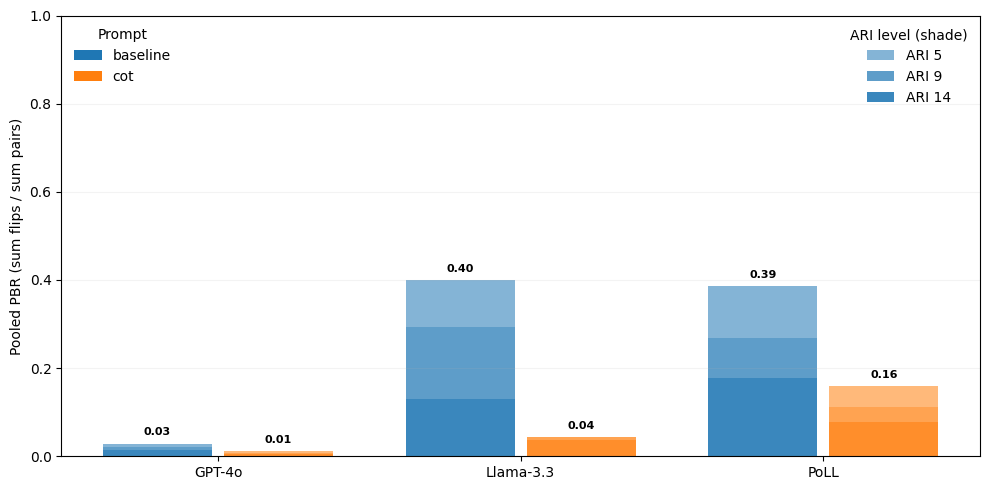

In [42]:
display_map = {
    "gpt-3": "GPT-3.5",
    "gpt-4": "GPT-4o",
    "llama-3-70b": "Llama-3.3",
}

plot_stacked_bars_group(
    clean_pbr,
    models=["gpt-3", "Qwen", "Mistral", "PoLL"],
    include_poll=True,
    title="",
    display_map=display_map,
    save_name="Poll_pbr.pdf"
)
plot_stacked_bars_group(clean_pbr, ["gpt-4","llama-3-70b","PoLL"],
                        include_poll=True,
                        title="",
                        show_ari_legend=True, display_map=display_map,save_name="Pbr.pdf")


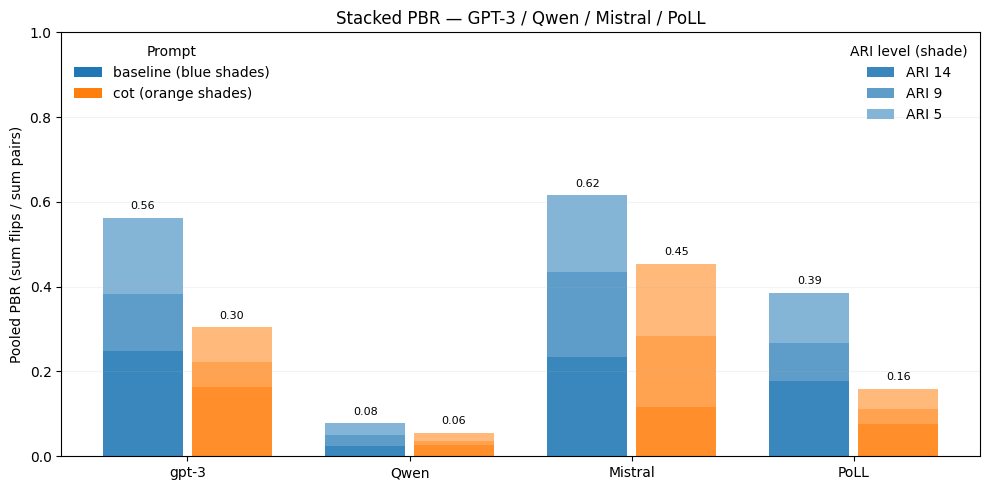

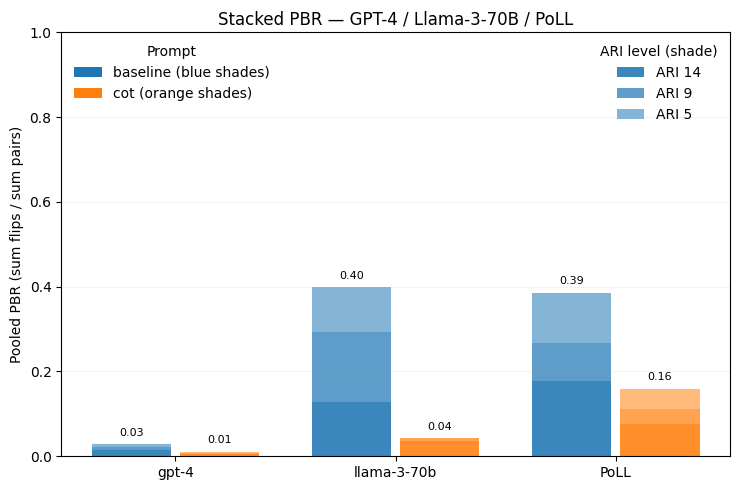

In [155]:
# With ARI legend (recommended)
plot_stacked_bars_group(clean_pbr, ["gpt-3","Qwen","Mistral","PoLL"],
                        include_poll=True,
                        title="Stacked PBR — GPT-3 / Qwen / Mistral / PoLL",
                        show_ari_legend=True, annotate_segments=False)
plot_stacked_bars_group(clean_pbr, ["gpt-4","llama-3-70b","PoLL"],
                        include_poll=True,
                        title="Stacked PBR — GPT-4 / Llama-3-70B / PoLL",
                        show_ari_legend=True, annotate_segments=False)
# If you also want numbers “14/9/5” printed on each stack:
# plot_stacked_bars_group(clean_pbr, ["gpt-4","llama-3-70b","PoLL"],
#                         include_poll=True,
#                         title="Stacked PBR — GPT-4 / Llama-3-70B / PoLL",
#                         show_ari_legend=True, annotate_segments=True)


In [137]:
from matplotlib.colors import to_rgb
from matplotlib.patches import Patch

# --- correct lightening: alpha=0 -> original; alpha=1 -> white
def lighten(color_hex: str, alpha: float):
    r, g, b = to_rgb(color_hex)
    return (r + alpha*(1 - r), g + alpha*(1 - g), b + alpha*(1 - b))

BASELINE_COLOR = "#1f77b4"  # blue
COT_COLOR      = "#ff7f0e"  # orange

# darkest (ARI 14) -> lightest (ARI 5)
def shade_map(base_hex: str):
    return {
        14: lighten(base_hex, 0.15),  # darkest
        9:  lighten(base_hex, 0.45),  # mid
        5:  lighten(base_hex, 0.75),  # lightest
    }

BASELINE_SHADES = shade_map(BASELINE_COLOR)
COT_SHADES      = shade_map(COT_COLOR)
ARI_LEVELS = [14, 9, 5]  # draw in this order

# --- inside plot_stacked_bars_group(), replace the stacking loop + legends with:
for i, pr in enumerate(prompts):
    base_x = x + (i - 0.5) * (width + 0.04)
    bottoms = np.zeros_like(base_x, dtype=float)

    for ari in ARI_LEVELS:
        seg = merged[(merged["prompt"] == pr) & (merged["ari"] == ari)]
        seg = seg.set_index("judge").reindex(judges).fillna(0.0)
        h = seg["segment_height"].values
        color = BASELINE_SHADES[ari] if pr == "baseline" else COT_SHADES[ari]

        ax.bar(
            base_x, h, width=width, bottom=bottoms,
            color=color,
            edgecolor='none', linewidth=0, antialiased=False
        )
        bottoms = np.round(bottoms + h, 12)

    # annotate total height (pooled PBR)
    bh = bars[bars["prompt"] == pr].set_index("judge").reindex(judges)["bar_height"].values
    for xi, yi in zip(base_x, bh):
        if np.isfinite(yi):
            ax.annotate(f"{yi:.2f}", (xi, yi), textcoords="offset points",
                        xytext=(0, 6), ha="center", fontsize=8)

# Legends (two separate legends; prompt + ARI)
prompt_handles = [
    Patch(facecolor=BASELINE_COLOR, label="baseline (blue shades)"),
    Patch(facecolor=COT_COLOR,      label="cot (orange shades)"),
]
leg1 = ax.legend(handles=prompt_handles, title="Prompt", loc="upper left", frameon=False)
ax.add_artist(leg1)

ari_handles = [
    Patch(facecolor=BASELINE_SHADES[14], label="ARI 14"),
    Patch(facecolor=BASELINE_SHADES[9],  label="ARI 9"),
    Patch(facecolor=BASELINE_SHADES[5],  label="ARI 5"),
]
ax.legend(handles=ari_handles, title="ARI level (shade)", loc="upper right", frameon=False)


NameError: name 'prompts' is not defined

In [138]:
# inside the stacking loop, after drawing each segment:
for xi, yi, hi in zip(base_x, bottoms - h, h):
    if hi > 0.0:
        ax.text(xi, yi + hi/2, f"{ari}", ha="center", va="center", fontsize=8)


NameError: name 'base_x' is not defined

     prompt  ari  pbr_excl  pbr_incl  delta_incl_minus_excl
0  baseline    5  0.301126  0.309762               0.008636
1  baseline    9  0.319867  0.311428              -0.008439
2  baseline   14  0.389258  0.413470               0.024211
3       cot    5  0.165735  0.162410              -0.003326
4       cot    9  0.145600  0.138384              -0.007216
5       cot   14  0.208196  0.211860               0.003664


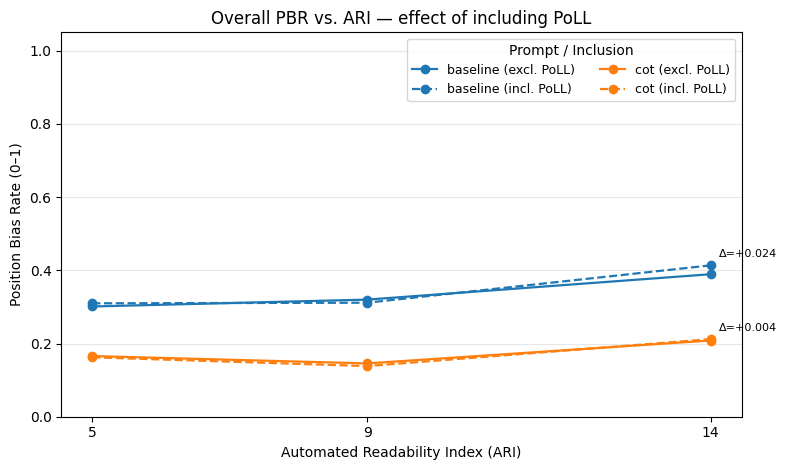

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ENSEMBLES = {"PoLL"}

def _macro_curve(clean_pbr, include_poll: bool):
    d = clean_pbr.copy()
    d["ari"] = pd.to_numeric(d["ari"], errors="coerce")
    d = d.dropna(subset=["ari", "swap_flip_rate"])
    if not include_poll:
        d = d[~d["judge"].isin(ENSEMBLES)]
    return (d.groupby(["prompt","ari"], as_index=False)
              .agg(pbr=("swap_flip_rate","mean"))
              .sort_values(["prompt","ari"]))

def compare_overall_effect(clean_pbr):
    excl = _macro_curve(clean_pbr, include_poll=False).rename(columns={"pbr":"pbr_excl"})
    incl = _macro_curve(clean_pbr, include_poll=True ).rename(columns={"pbr":"pbr_incl"})
    out = excl.merge(incl, on=["prompt","ari"], how="inner")
    out["delta_incl_minus_excl"] = out["pbr_incl"] - out["pbr_excl"]
    return out

def plot_overlay_incl_excl(clean_pbr, title=None):
    excl = _macro_curve(clean_pbr, include_poll=False)
    incl = _macro_curve(clean_pbr, include_poll=True )
    ari_order = sorted(excl["ari"].unique().tolist())

    fig, ax = plt.subplots(figsize=(8, 4.8))
    for pr, color in [("baseline","#1f77b4"), ("cot","#ff7f0e")]:
        e = excl[excl["prompt"]==pr].set_index("ari").reindex(ari_order)["pbr"].values
        i = incl[incl["prompt"]==pr].set_index("ari").reindex(ari_order)["pbr"].values
        xs = np.array(ari_order)

        ax.plot(xs, e, marker="o", color=color, linewidth=1.6, label=f"{pr} (excl. PoLL)")
        ax.plot(xs, i, marker="o", color=color, linewidth=1.6, linestyle="--", label=f"{pr} (incl. PoLL)")

        # annotate at ARI-14 to show direction
        if len(xs)>0 and np.isfinite(e[-1]) and np.isfinite(i[-1]):
            ax.annotate(f"Δ={i[-1]-e[-1]:+.03f}", (xs[-1], i[-1]),
                        textcoords="offset points", xytext=(6, 6), fontsize=8)

    ax.set_title(title or "Overall PBR vs. ARI — effect of including PoLL")
    ax.set_xlabel("Automated Readability Index (ARI)")
    ax.set_ylabel("Position Bias Rate (0–1)")
    ax.set_xticks(ari_order)
    ax.set_ylim(0, 1.05)
    ax.grid(axis="y", alpha=0.3)
    ax.legend(ncol=2, fontsize=9, title="Prompt / Inclusion")
    plt.tight_layout()
    plt.show()

# Use:
diff_tbl = compare_overall_effect(clean_pbr)
print(diff_tbl)       # shows pbr_excl, pbr_incl, and the delta per prompt×ARI
plot_overlay_incl_excl(clean_pbr)
